# Portfolio Project: Online Retail Exploratory Data Analysis with Python

# Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

<b> Project Objectives:

    1. Busiest Sales Months, 
    2. Best-Selling Products,
    3. The Store'S Most Valuable Customers.
----

<b> The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred



# Codes

In [7]:
import pandas as pd

In [89]:
pd.__version__ 

'1.3.5'

In [76]:
document_file = pd.read_excel('Online Retail.xlsx', index_col=0)

In [1587]:
print(document_file.head())

          StockCode                          Description  Quantity  \
InvoiceNo                                                            
536365       85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
536365        71053                  WHITE METAL LANTERN         6   
536365       84406B       CREAM CUPID HEARTS COAT HANGER         8   
536365       84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
536365       84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

                  InvoiceDate  UnitPrice  CustomerID         Country  
InvoiceNo                                                             
536365    2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
536365    2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
536365    2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
536365    2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
536365    2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [6]:
document_file.count()

StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [225]:
document_file = document_file.dropna()

In [226]:
document_file.groupby('Description')[['Quantity']].sum().nsmallest(50,'Quantity')

Quantity
Description                                  
ROTATING SILVER ANGELS T-LIGHT HLDR     -1460
Discount                                -1194
ASSORTED TUTTI FRUTTI ROUND BOX           -24
CRUK Commission                           -16
PINK POODLE HANGING DECORATION            -12
ROBIN CHRISTMAS CARD                       -9
WHITE CHERRY LIGHTS                        -8
BLUE PADDED SOFT MOBILE                    -6
VINTAGE GOLD TINSEL REEL                   -6
WOODEN BOX ADVENT CALENDAR                 -6
CHALKBOARD KITCHEN ORGANISER               -4
PINK CHERRY LIGHTS                         -4
ANTIQUE LILY FAIRY LIGHTS                  -3
CREAM SWEETHEART MAGAZINE RACK             -3
PINK SMALL GLASS CAKE STAND                -3
3 WICK CHRISTMAS BRIAR CANDLE              -2
BLUE FLYING SINGING CANARY                 -1
CREAM SWEETHEART SHELF + HOOKS             -1
CREAM SWEETHEART TRAYS                     -1
FLAMINGO LIGHTS                            -1
LARGE ROUND CUTGLASS CANDLESTICK           -1
PINK LARGE JEWELED PHOTOFRAME              -1
PORCELAIN HANGING BELL SMALL               -1
SMALL TAHITI BEACH BAG                     -1
SWEETHEART KEY CABINET                     -1
TEA TIME CAKE STAND IN GIFT BOX            -1
WOOLLY HAT SOCK GLOVE ADVENT STRING        -1
2 DAISIES HAIR COMB                         0
BLACK 3 BEAD DROP EARRINGS                  0
BLACK CHERRY LIGHTS                         0
CLASSIC DIAMANTE EARRINGS JET               0
DAISY HAIR COMB                             0
DIAMANTE HAIR GRIP PACK/2 CRYSTAL           0
DIAMANTE HAIR GRIP PACK/2 PERIDOT           0
DROP DIAMANTE EARRINGS GREEN                0
GLASS CAKE COVER AND PLATE                  0
HANGING RIDGE GLASS T-LIGHT HOLDER          0
PAPER CRAFT , LITTLE BIRDIE                 0
PINK DAISY BAG CHARM                        0
PURPLE ENAMEL FLOWER HAIR TIE               0
SET 10 CARDS HANGING BAUBLES 17080          0
WHITE BEADED GARLAND STRING 20LIGHT         0
 I LOVE LONDON MINI RUCKSACK                1
AMBER BERTIE GLASS BEAD BAG CHARM           1
AMBER GLASS/SHELL/PEARL NECKLACE            1
BAROQUE BUTTERFLY EARRINGS CRYSTAL          1
BLACK DROP EARRINGS W LONG BEADS            1
BLACK FINE BEAD NECKLACE W TASSEL           1
BLACK VINT ART DEC CRYSTAL BRACELET         1
BLACKCHRISTMAS TREE 30CM                    1

* Seemingly dropna not to mean that removing all with 0 value
  * Let's specify more and try again...

In [227]:
def get_min(def_, val_=10, exclude_=False): 
    if exclude_:
        data_frame = document_file.groupby('Description')[[def_]].sum().\
            nsmallest(val_,def_).nlargest(val_,def_).iloc[:val_-exclude_]
    else:    
        data_frame = document_file.groupby('Description')[[def_]].sum().nsmallest(val_,def_).nlargest(val_,def_)
    data_frame = data_frame.loc[(data_frame !=0).any(1)]
    return data_frame

In [228]:
def get_max(def_, val_=10,exclude_=False): 
    if exclude_:
        return document_file.groupby('Description')[[def_]].sum().nlargest(val_,def_).iloc[exclude_:]
        
    return document_file.groupby('Description')[[def_]].sum().nlargest(val_,def_)

In [229]:
len(get_min('Quantity',50))

35

 * Which means that 15 of them have 0 value, let's look again without zeros.
 * Perhaps some visualization helps too.

In [230]:
get_min('Quantity',50)

Quantity
Description                                  
BLACKCHRISTMAS TREE 30CM                    1
BLACK VINT ART DEC CRYSTAL BRACELET         1
BLACK FINE BEAD NECKLACE W TASSEL           1
BLACK DROP EARRINGS W LONG BEADS            1
BAROQUE BUTTERFLY EARRINGS CRYSTAL          1
AMBER GLASS/SHELL/PEARL NECKLACE            1
AMBER BERTIE GLASS BEAD BAG CHARM           1
 I LOVE LONDON MINI RUCKSACK                1
WOOLLY HAT SOCK GLOVE ADVENT STRING        -1
TEA TIME CAKE STAND IN GIFT BOX            -1
SWEETHEART KEY CABINET                     -1
SMALL TAHITI BEACH BAG                     -1
PORCELAIN HANGING BELL SMALL               -1
PINK LARGE JEWELED PHOTOFRAME              -1
LARGE ROUND CUTGLASS CANDLESTICK           -1
FLAMINGO LIGHTS                            -1
CREAM SWEETHEART TRAYS                     -1
CREAM SWEETHEART SHELF + HOOKS             -1
BLUE FLYING SINGING CANARY                 -1
3 WICK CHRISTMAS BRIAR CANDLE              -2
CREAM SWEETHEART MAGAZINE RACK             -3
ANTIQUE LILY FAIRY LIGHTS                  -3
PINK SMALL GLASS CAKE STAND                -3
PINK CHERRY LIGHTS                         -4
CHALKBOARD KITCHEN ORGANISER               -4
WOODEN BOX ADVENT CALENDAR                 -6
VINTAGE GOLD TINSEL REEL                   -6
BLUE PADDED SOFT MOBILE                    -6
WHITE CHERRY LIGHTS                        -8
ROBIN CHRISTMAS CARD                       -9
PINK POODLE HANGING DECORATION            -12
CRUK Commission                           -16
ASSORTED TUTTI FRUTTI ROUND BOX           -24
Discount                                -1194
ROTATING SILVER ANGELS T-LIGHT HLDR     -1460

<AxesSubplot:xlabel='Description'>

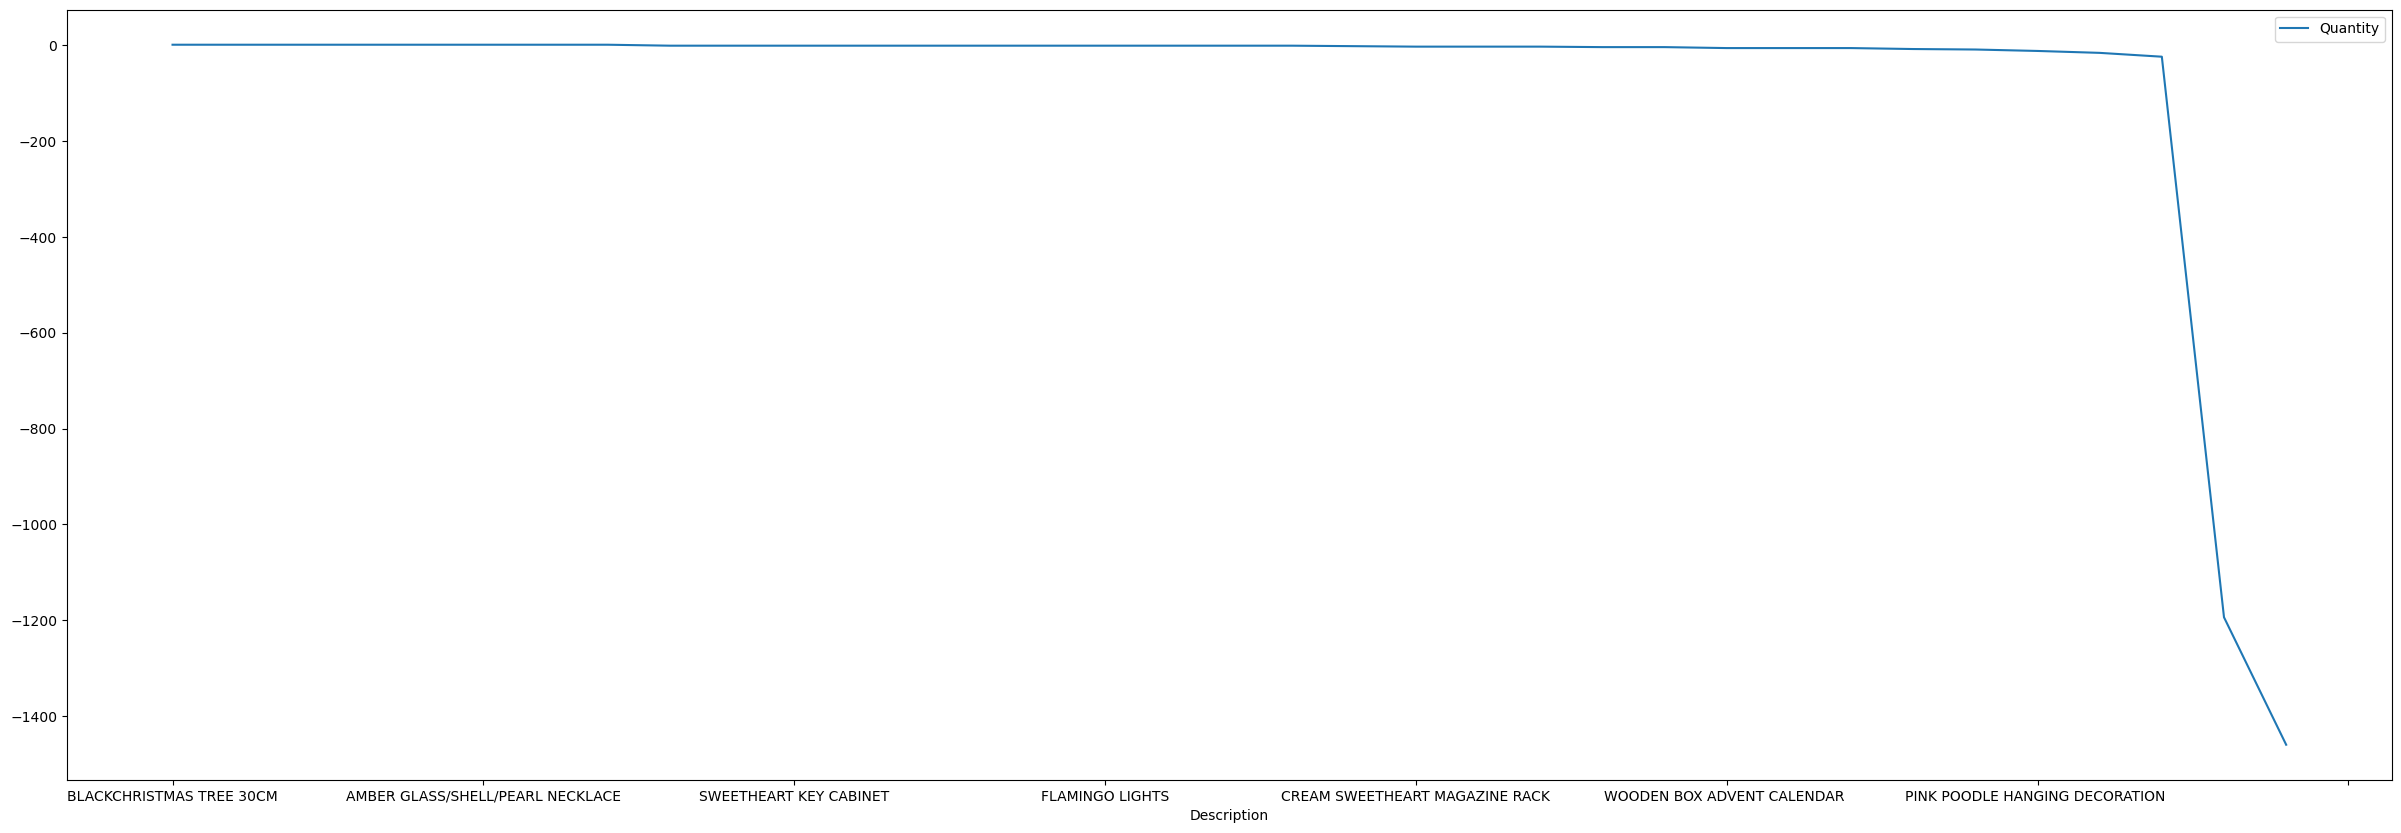

In [231]:
get_min('Quantity',50).plot.line(figsize=(30,10) )


* To have a better grasp, let's exclude last two line with a huge margin

* Here we have a list of products that cause money lost!

<AxesSubplot:title={'center':'Products That Damage Profit'}>

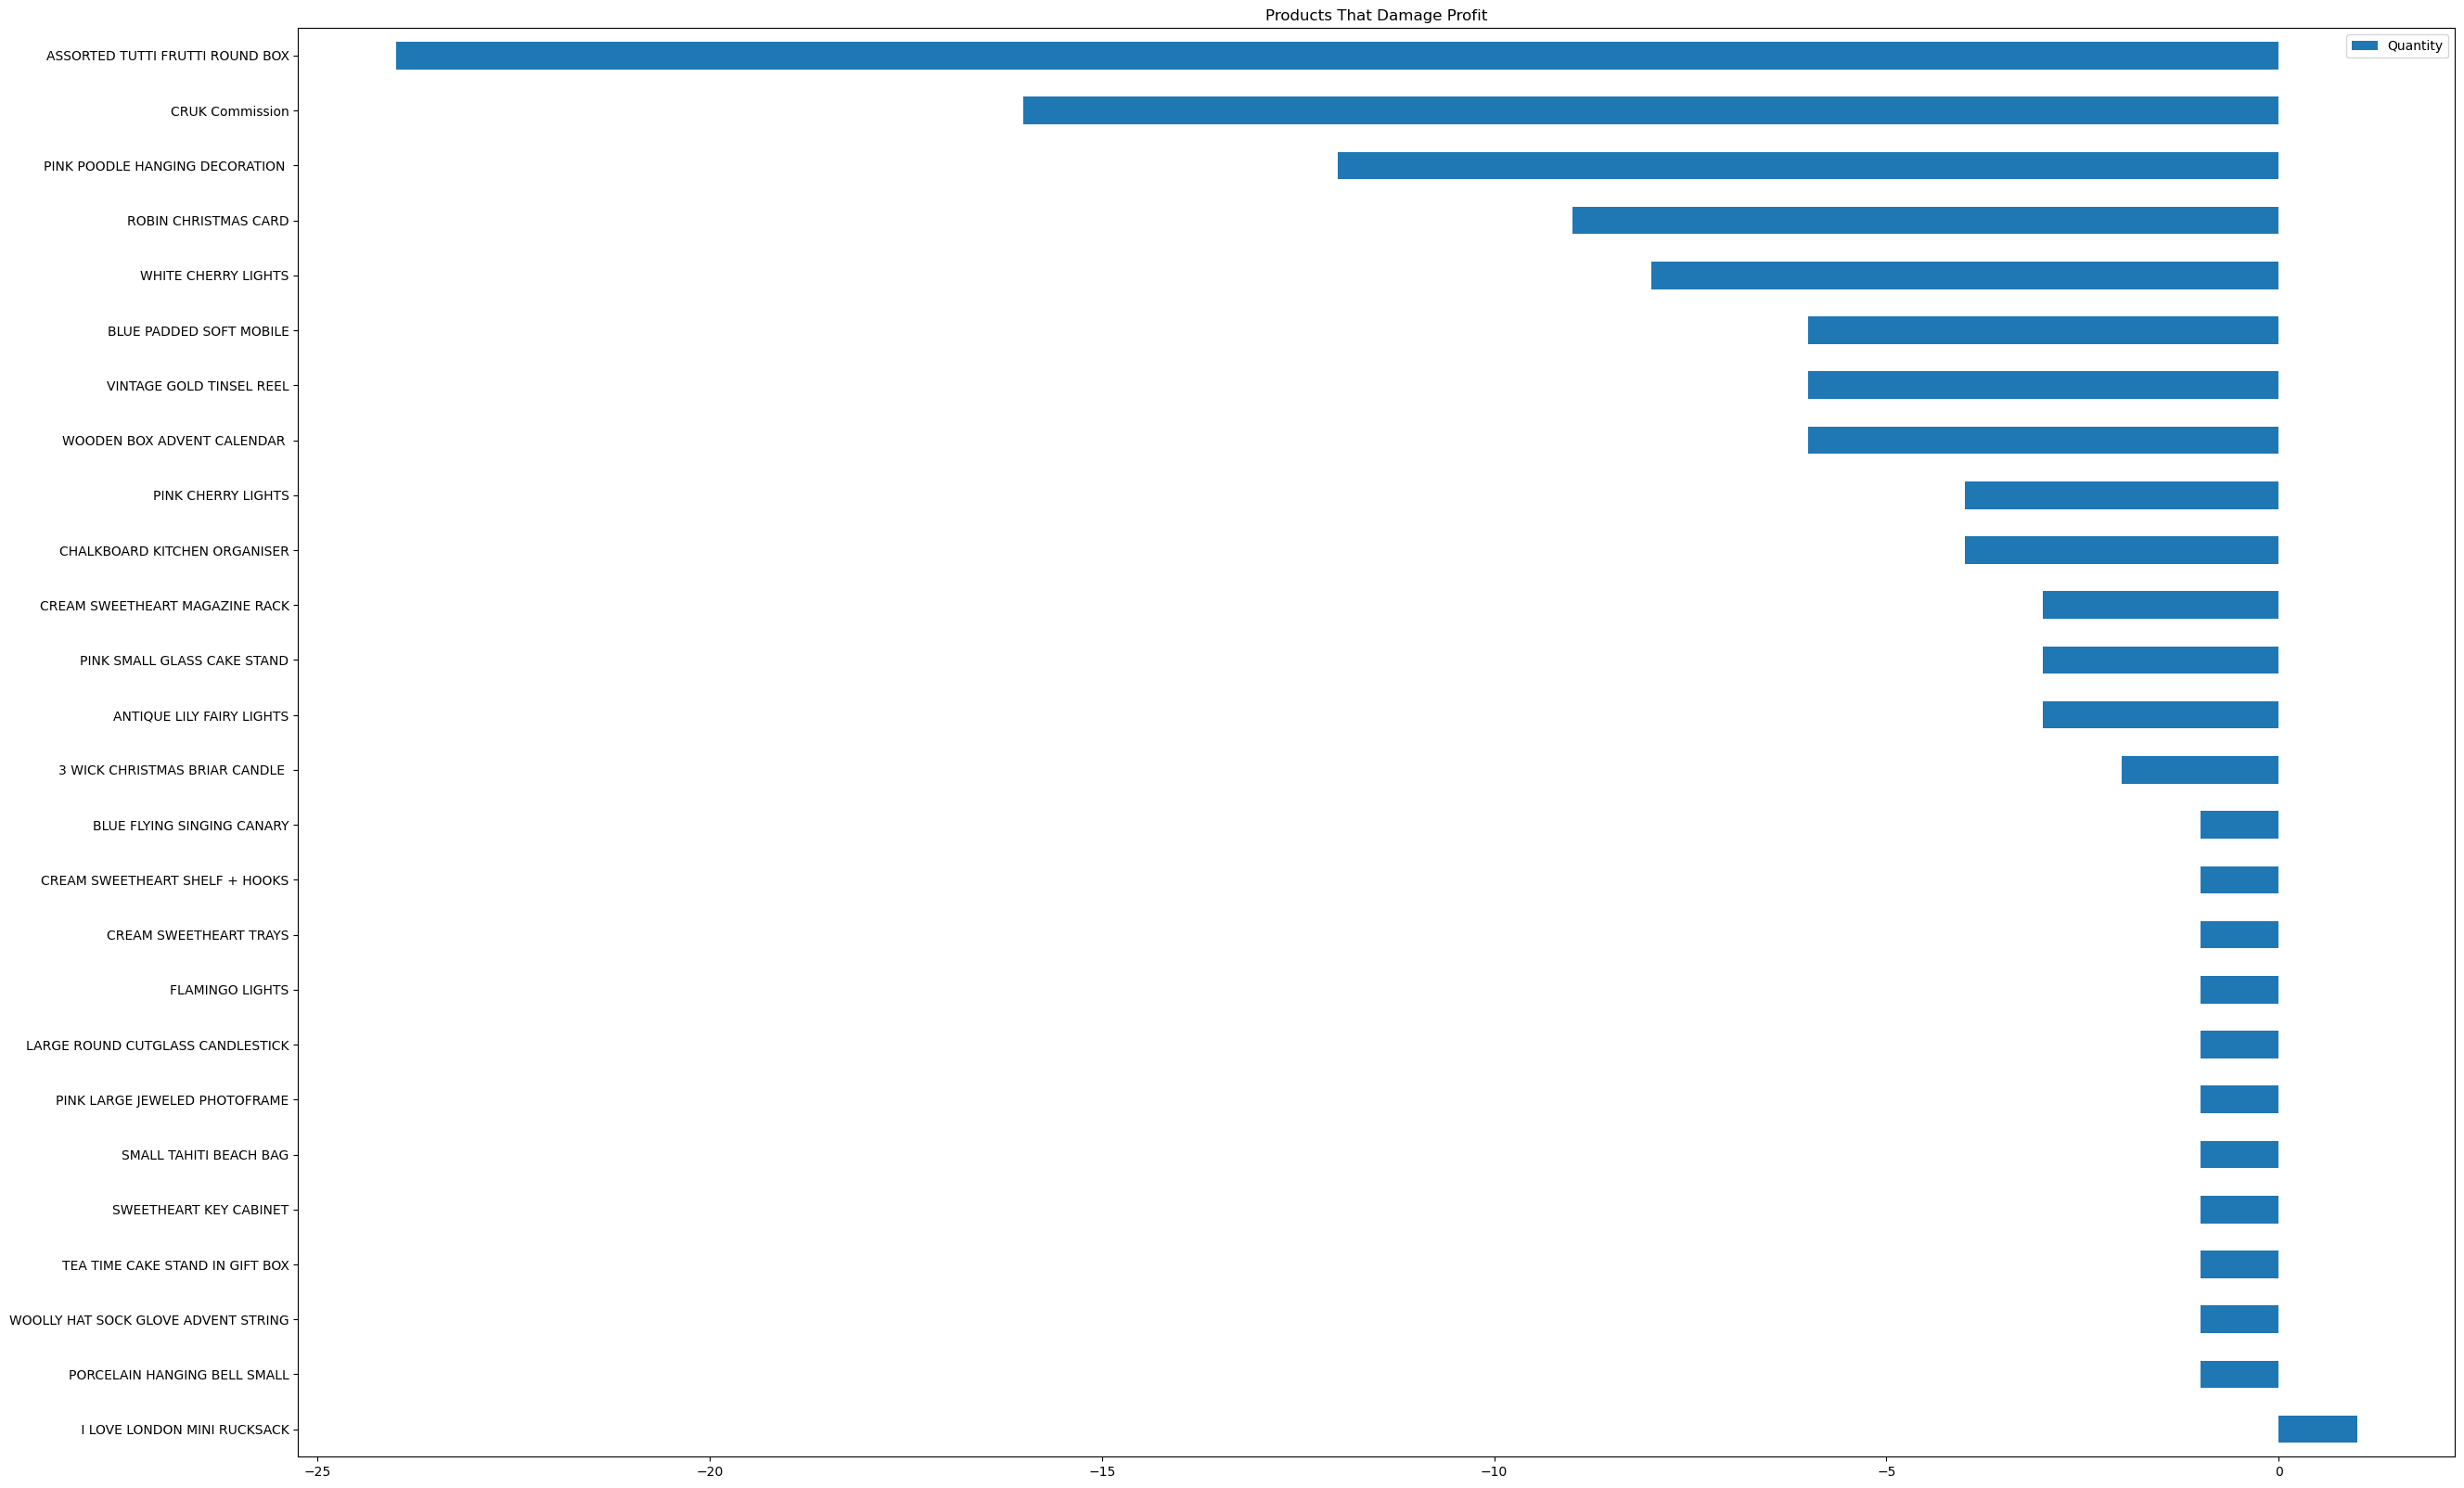

In [232]:
get_min('Quantity',43,2).plot.barh(figsize=(30,20), xlabel="", title="Products That Damage Profit" )


<AxesSubplot:title={'center':'World War 2 Gliders Asstd Designs Avarage Quantity By Day: 7602.143\n'}>

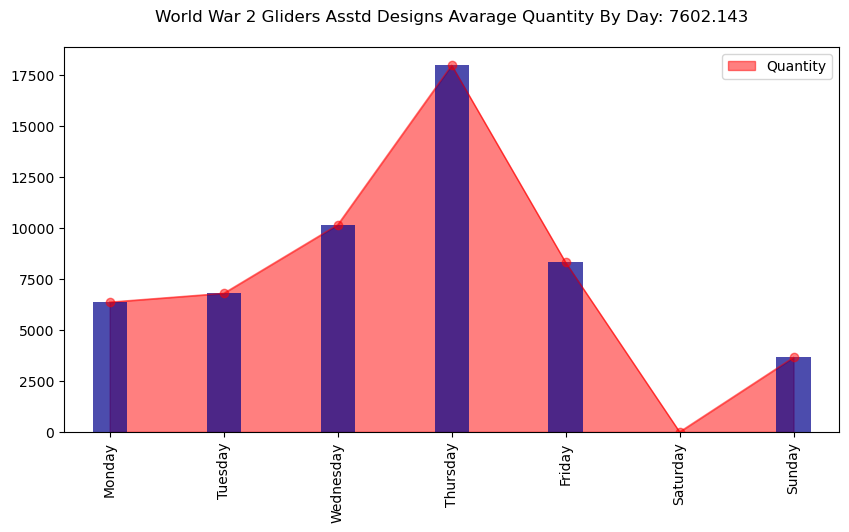

In [233]:
def get_product_performance_(product, _by='Quantity', rule_='M'):
    ### to get the performance value we need 'Description' and 'InvoiceDate' by default
    list_ = ['Description','InvoiceDate']
    list_.append(_by)

    ## as_index is false option helps to form a new column instead of an index
    df = document_file.groupby([list_[0], list_[1] ], as_index=False).sum()

    # other columns are not needed, let's get rid of them
    for dp_ in df.columns: 
        if dp_ not in list_: df.drop([dp_], axis=1, inplace=True)
    #let's move the date column at the end just in case
    
    df.insert(len(df.columns) -1, "InvoiceDate", df.pop("InvoiceDate"))
    # have a new dataframe to focus solely on product 
    df = df.loc[df['Description'] == product ]

    if df.empty:
        print('No match with ', product,' name..')
        return False

    #################### version check for dt.week feature
    if int(pd.__version__[2]) >= 3: week = ['dt.isocalendar().week',True]
    else:  week ='dt.week'
        
    ############ define them in a list as if working with resample function 
    dict_ = {'h': 'dt.hour','m': ['dt.month_name',True], 'y': 'dt.year','d':['dt.day_name',True],'w':week}
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    ########## we have spare the date column, now it's time use it with function args
    
    m, rule, ruler = df['InvoiceDate'], rule_[0].lower(), dict_[rule_]
    s, s_ = False, False

    ### if the key returns list then firs item in a list must be called as () 
    if type(ruler) is list: sp = ruler[0].split('.')
    else: sp = ruler.split('.'); s_ = True

    for i in range(len(sp)):
        
        if s is False: s = getattr(m, sp[i] )
        # s_ if item must be called before, catching it with '('...
        elif '(' in sp[i]: s_ = sp[i].split('(')[0]; s = getattr(s, s_ )();  s_ = True
        else: s = getattr(s, sp[i] )
            
    name = sp[i].replace('_','').replace('name','')
    
    if s_: df = df.groupby(s ).sum() 
    else: df = df.groupby(s() ).sum() 

    # re_index if rule_ is month or day...
    if rule_ == 'm': df = df.reindex(month_order, axis=0)
    if rule_ == 'd': df = df.reindex(day_order, axis=0)

    df = df.fillna(0) 
    ## there might be a day off or perhaps something weird 
    if rule != 'd': df = df.loc[(df !=0).any(1)]

    title_ =  product +' AvaRage '+ _by.upper() +' by '+name+ ': ' +str( round(df.mean()[0],3) )+'\n'
    title_ = title_.title()
    
    if len(df) == 1:
        print('This product: ', product,' only dated once no more data to calculate')
        return df.plot.barh(title=title_, ylabel=_by ) 
    else:
        negative = [ x for x in df.values.tolist() if x[0] < 0 ]
        if negative: return df.plot(title=title_, xlabel="", figsize=(10,7),kind='barh').invert_xaxis()

        ax= df.plot(figsize=(10,5), kind='area', stacked=False, use_index=False,\
                       style='o-',color='red', linewidth=1.0)  
        return df.plot(title=title_, xlabel="", figsize=(10,5),kind='bar', legend=False,\
                       width=0.3,alpha=0.7, capstyle='round',color='darkblue',linewidth=2.0, ax=ax) 
    
get_product_performance_('WORLD WAR 2 GLIDERS ASSTD DESIGNS','Quantity','d')


In [234]:
document_file = document_file.drop_duplicates()

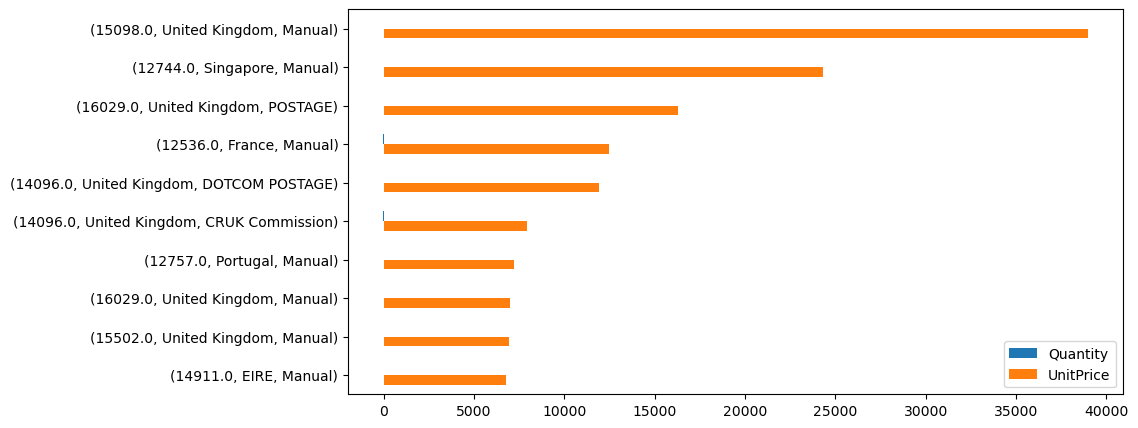

In [247]:
def get_customer(def_, val_=10, **kwargs):
    # list of expenses apart from products 
    # *kwarg- desc=: 1 without, >2 only, 0 with them returns the dataframe
    list_ = ['Manual','POSTAGE','Discount','CARRIAGE', 'DOTCOM POSTAGE', 'CRUK Commission']
    
    for key, value in kwargs.items():
        if key.lower() == 'desc':
            if value == 1:
                df = document_file.groupby(['CustomerID','Country','Description'] , as_index=False).sum()
                df = df.drop(df[df['Description'].isin(list_) ].index)
            elif value >= 2:
                df = document_file.groupby(['CustomerID','Country','Description'] , as_index=False).sum()
                df = df.drop(df[~df['Description'].isin(list_) ].index)
            elif value <= 0:
                df = document_file.groupby(['CustomerID','Country','Description'])[['Quantity','UnitPrice']].sum()
        
    if bool(kwargs.items()) != True:
        df = document_file.groupby(['CustomerID','Country'])[['Quantity','UnitPrice']].sum()
        
    elif df.shape[1] > 2:
        df = df.groupby(['CustomerID','Country','Description']).sum()


        
    if val_ < 10: val__ = 20
    else: val__ = val_
    
    df = df.sort_values(by=def_, ascending=False).nlargest(val_,def_)
    return df.plot(kind='barh', xlabel='', figsize=(10,val__/2)).invert_yaxis()

get_customer('UnitPrice',10, desc=3)

# 1. Busiest Sales Months

<AxesSubplot:xlabel='InvoiceDate'>

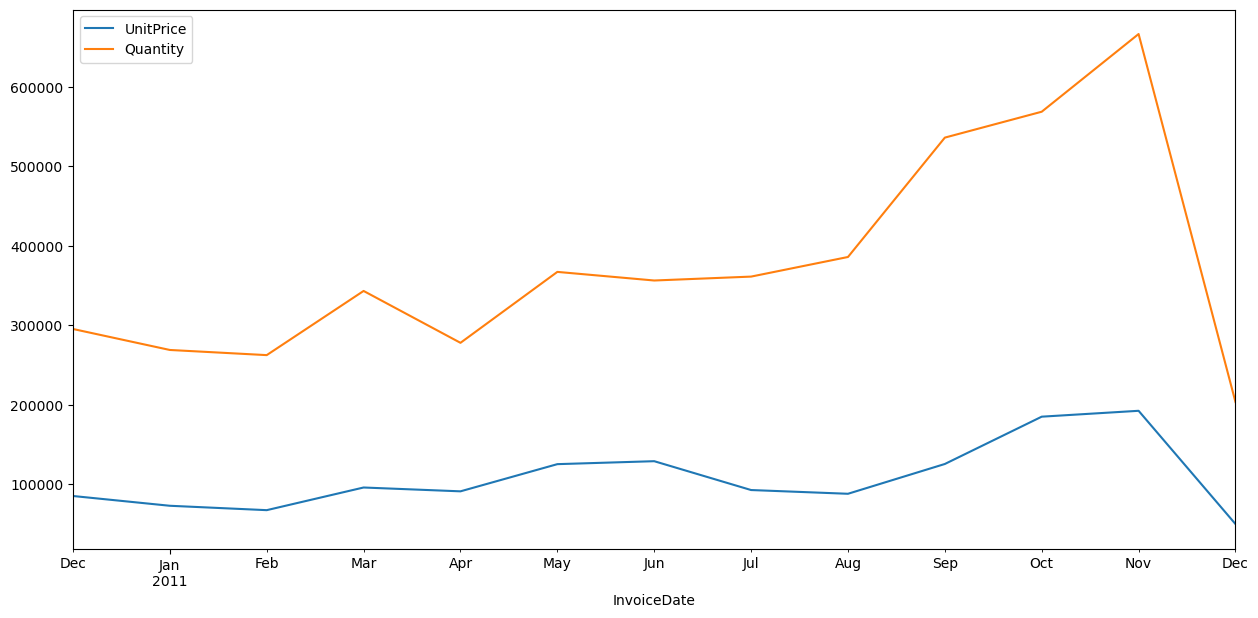

In [236]:
document_file.resample(rule='M', on='InvoiceDate')[['UnitPrice', 'Quantity']].sum().plot(figsize=(15,7) )

<AxesSubplot:xlabel='InvoiceDate'>

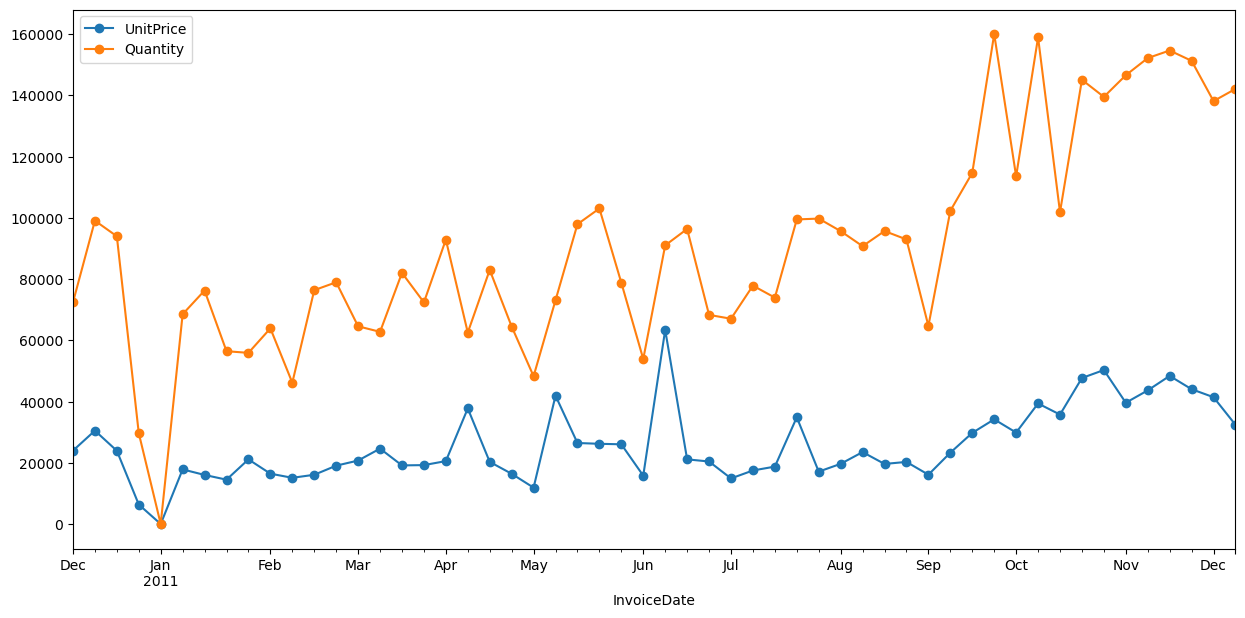

In [237]:
document_file.resample(rule='W', on='InvoiceDate')[['UnitPrice', 'Quantity']].sum().plot(style='-o', figsize=(15,7) )

<AxesSubplot:xlabel='InvoiceDate'>

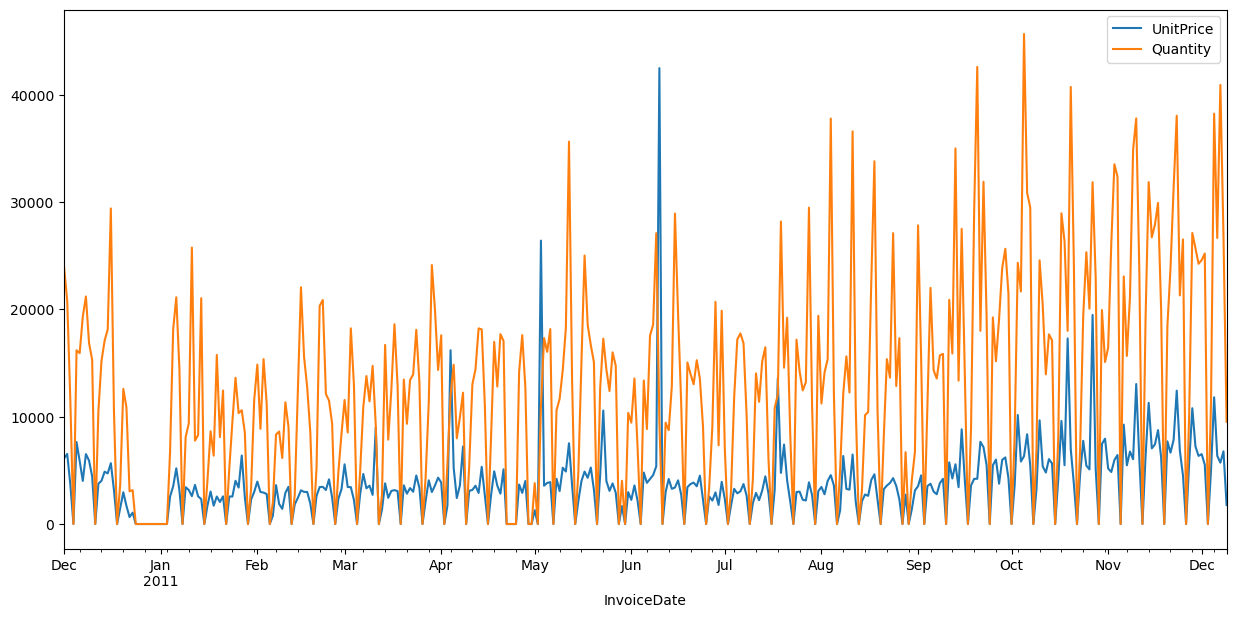

In [238]:
document_file.resample(rule='D', on='InvoiceDate')[['UnitPrice', 'Quantity']].sum().plot( figsize=(15,7) )

<AxesSubplot:xlabel='InvoiceDate'>

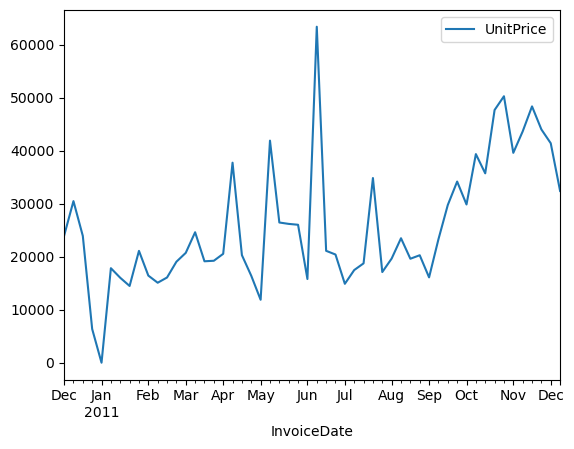

In [239]:
document_file.resample(rule='W', on='InvoiceDate')[['UnitPrice']].sum().plot()

In [240]:
weekly_data = document_file.resample(rule='W', on='InvoiceDate')
weekly_data[['Description']].sum().head(10)

Description
InvoiceDate                                                   
2010-12-05   WHITE HANGING HEART T-LIGHT HOLDERWHITE METAL ...
2010-12-12   SET OF 6 T-LIGHTS CACTI CITRONELLA CANDLE FLOW...
2010-12-19   HOME BUILDING BLOCK WORDLOVE BUILDING BLOCK WO...
2010-12-26   CHRISTMAS RETROSPOT STAR WOODCHRISTMAS RETROSP...
2011-01-02                                                   0
2011-01-09   JUMBO BAG PINK POLKADOTBLUE POLKADOT WRAPRED R...
2011-01-16   JAM JAR WITH PINK LIDJAM MAKING SET PRINTEDJAM...
2011-01-23   CERAMIC BOWL WITH STRAWBERRY DESIGNIVORY KITCH...
2011-01-30   JUMBO  BAG BAROQUE BLACK WHITEROUND SNACK BOXE...
2011-02-06   RED COAT RACK PARIS FASHIONSET OF 20 KIDS COOK...

2011-01-02 should be one-week-holiday.

In [241]:
weekly_data = document_file.resample(rule='W', on='InvoiceDate')
df = weekly_data[['Description']].sum()
df.loc[(df !=0).any(1)].head(10)

Description
InvoiceDate                                                   
2010-12-05   WHITE HANGING HEART T-LIGHT HOLDERWHITE METAL ...
2010-12-12   SET OF 6 T-LIGHTS CACTI CITRONELLA CANDLE FLOW...
2010-12-19   HOME BUILDING BLOCK WORDLOVE BUILDING BLOCK WO...
2010-12-26   CHRISTMAS RETROSPOT STAR WOODCHRISTMAS RETROSP...
2011-01-09   JUMBO BAG PINK POLKADOTBLUE POLKADOT WRAPRED R...
2011-01-16   JAM JAR WITH PINK LIDJAM MAKING SET PRINTEDJAM...
2011-01-23   CERAMIC BOWL WITH STRAWBERRY DESIGNIVORY KITCH...
2011-01-30   JUMBO  BAG BAROQUE BLACK WHITEROUND SNACK BOXE...
2011-02-06   RED COAT RACK PARIS FASHIONSET OF 20 KIDS COOK...
2011-02-13   REGENCY CAKESTAND 3 TIERBLUE STRIPE CERAMIC DR...

In [346]:
document_file.resample(rule='M', on='InvoiceDate')[['Description']].sum()

Description
InvoiceDate                                                   
2010-12-31   WHITE HANGING HEART T-LIGHT HOLDERWHITE METAL ...
2011-01-31   JUMBO BAG PINK POLKADOTBLUE POLKADOT WRAPRED R...
2011-02-28   RED SPOT CERAMIC DRAWER KNOBRED STRIPE CERAMIC...
2011-03-31   DOORMAT UNION JACK GUNS AND ROSESDOORMAT HEART...
2011-04-30   LUNCH BAG DOLLY GIRL DESIGNHEART IVORY TRELLIS...
2011-05-31   RED TOADSTOOL LED NIGHT LIGHTASSORTED COLOUR M...
2011-06-30   FOOD COVER WITH BEADS SET 2 BREAD BIN DINER ST...
2011-07-31   ZINC METAL HEART DECORATIONHANGING JAM JAR T-L...
2011-08-31   6 RIBBONS ELEGANT CHRISTMAS SCANDINAVIAN REDS ...
2011-09-30   PINK POLKADOT BOWLPARTY CONES CANDY ASSORTEDRE...
2011-10-31   CHILLI LIGHTSRED RETROSPOT OVEN GLOVE VINTAGE ...
2011-11-30   SMALL GLASS HEART TRINKET POTBAG 250g SWIRLY M...
2011-12-31   SET OF 3 REGENCY CAKE TINSANTIQUE SILVER TEA G...

In [324]:
document_file.resample(rule='Y', on='InvoiceDate')[['Description']].sum()

Description
InvoiceDate                                                   
2010-12-31   WHITE HANGING HEART T-LIGHT HOLDERWHITE METAL ...
2011-12-31   JUMBO BAG PINK POLKADOTBLUE POLKADOT WRAPRED R...

<AxesSubplot:xlabel='InvoiceDate'>

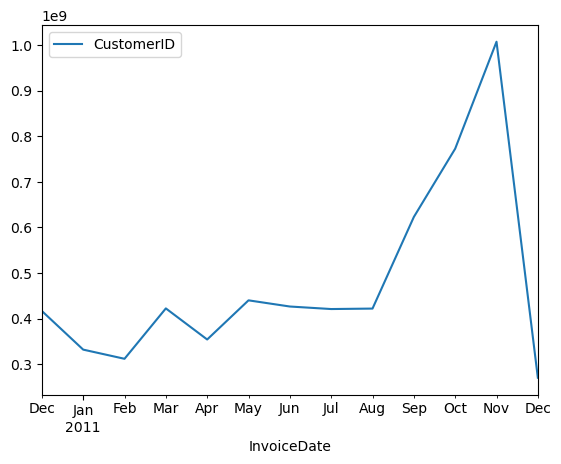

In [301]:
document_file.resample(rule='M', on='InvoiceDate')[['CustomerID']].sum().plot()

In [1440]:
document_file.groupby('InvoiceDate').sum()

Quantity  UnitPrice  CustomerID
InvoiceDate                                         
2010-12-01 08:26:00        40      27.37    124950.0
2010-12-01 08:28:00        12       3.70     35700.0
2010-12-01 08:34:00        98      77.34    208752.0
2010-12-01 08:35:00         3       5.95     13047.0
2010-12-01 08:45:00       449      55.29    251660.0
...                       ...        ...         ...
2011-12-09 12:23:00        76       3.30     27554.0
2011-12-09 12:25:00       120       2.57     27554.0
2011-12-09 12:31:00       278      37.78    331884.0
2011-12-09 12:49:00        66      20.23     52452.0
2011-12-09 12:50:00       105      44.50    190200.0

[20460 rows x 3 columns]

# 2. Best-selling Products

##  Top 10 Best Selling Products Monthly Performance On Quantity

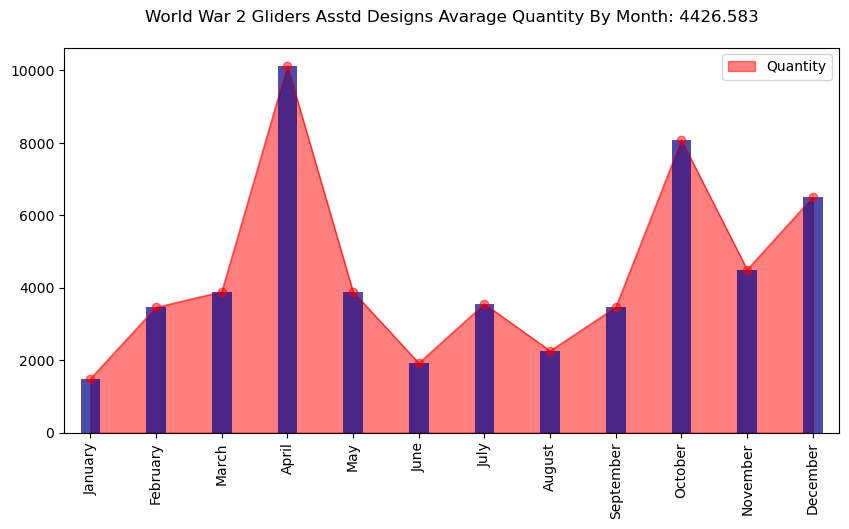

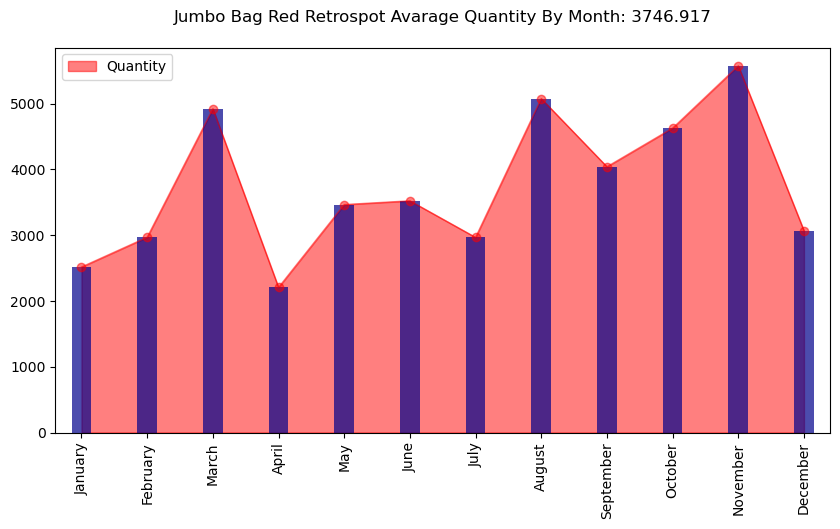

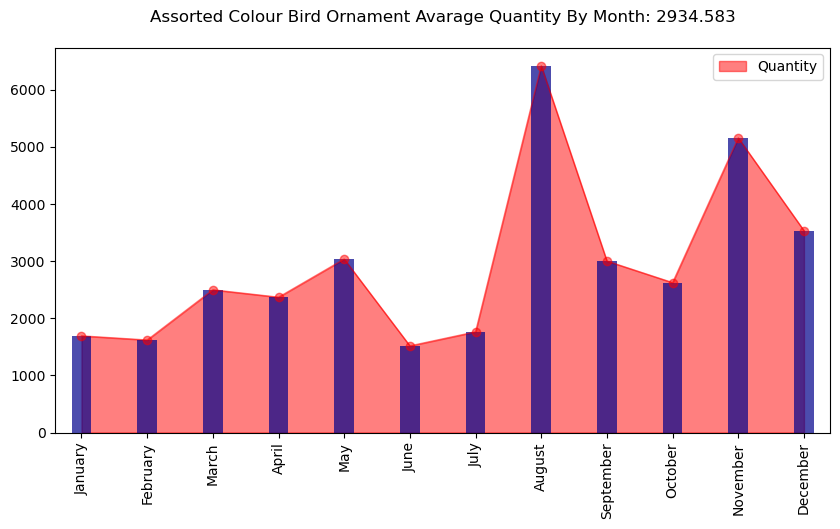

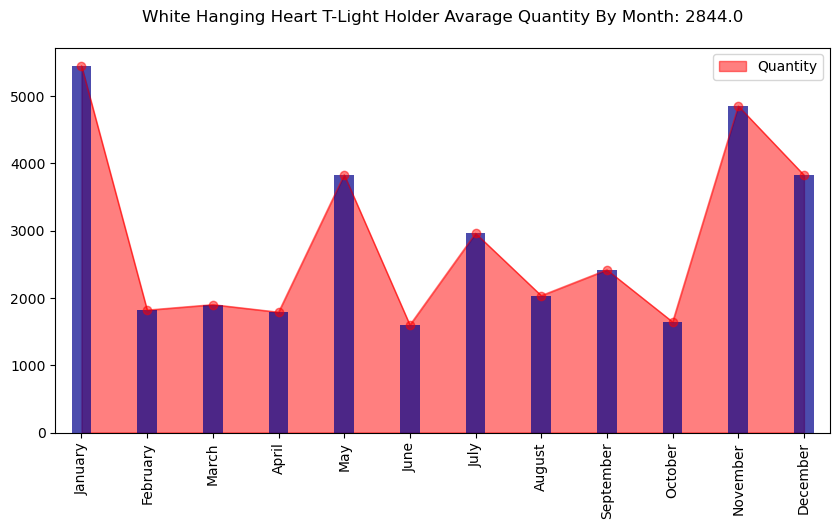

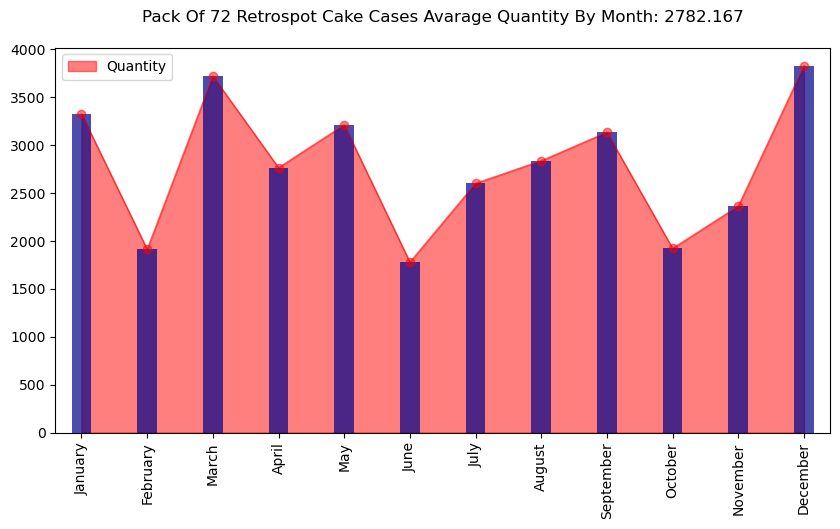

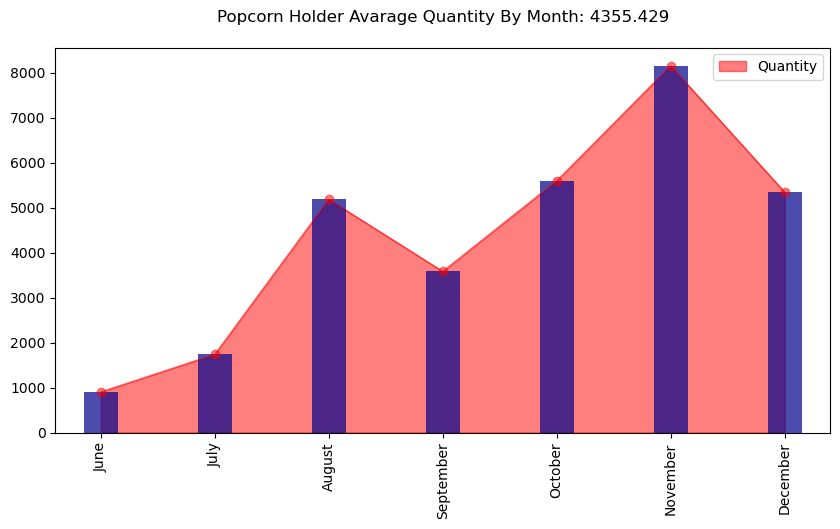

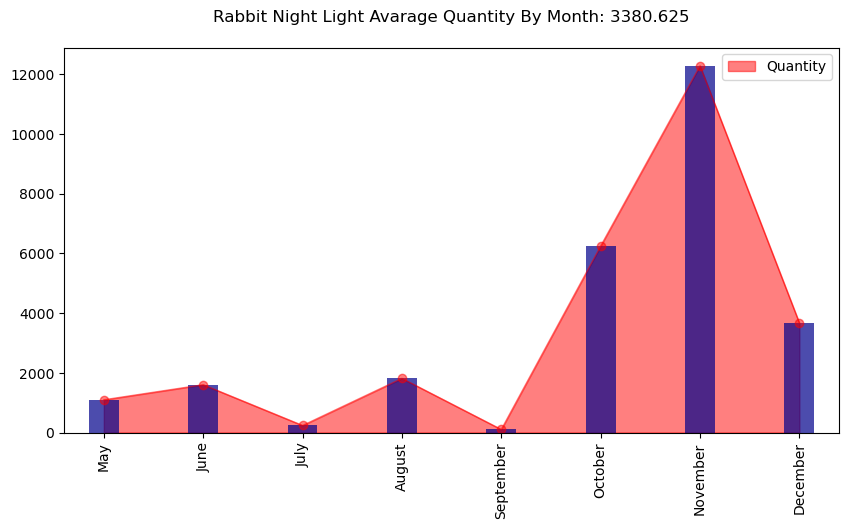

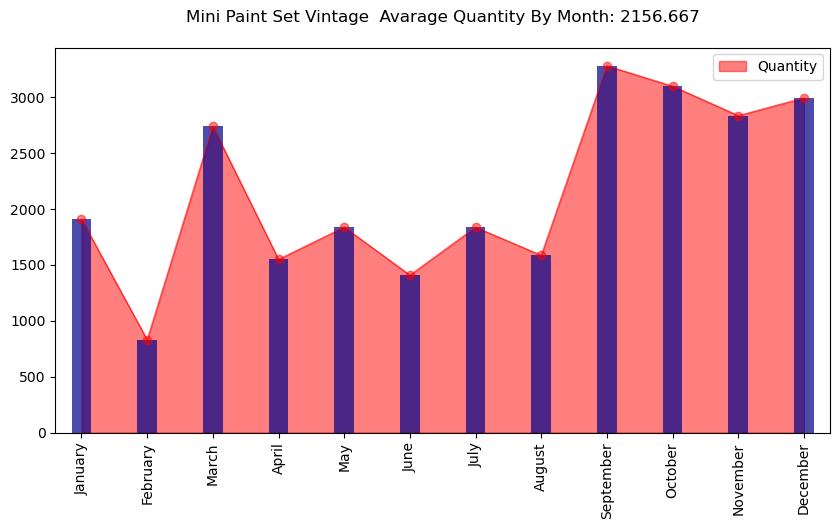

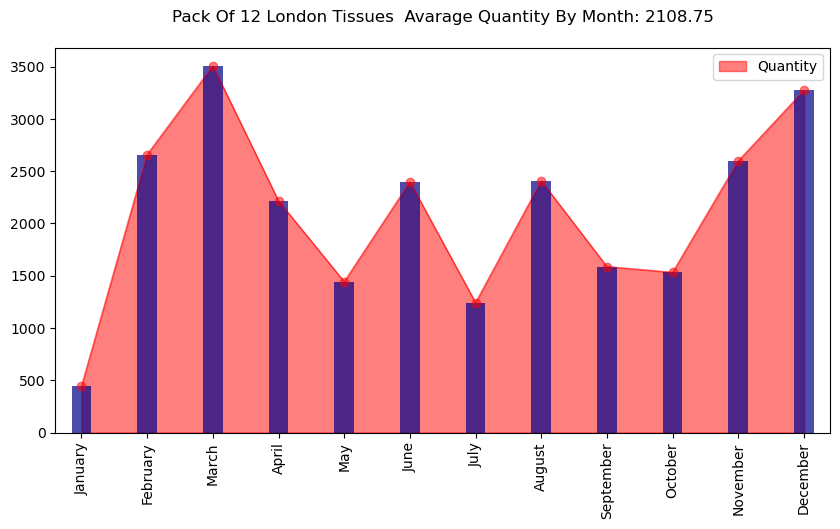

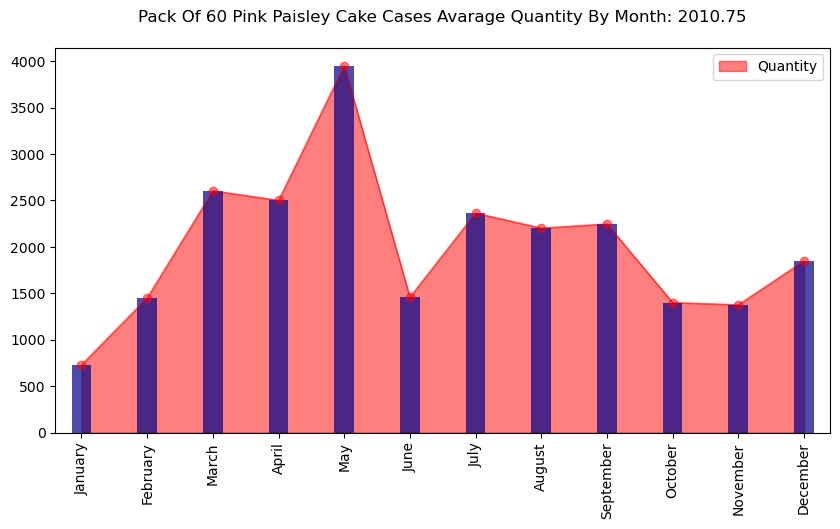

In [242]:
for x in get_max('Quantity').reset_index()['Description'].tolist():
    get_product_performance_(x,'Quantity','m')

## Top 10 Best Selling Products Monthly Performance On UnitPrice

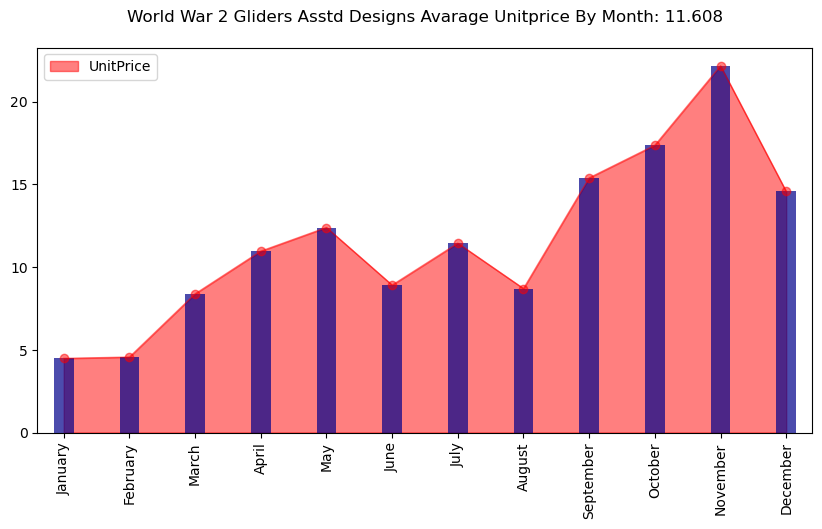

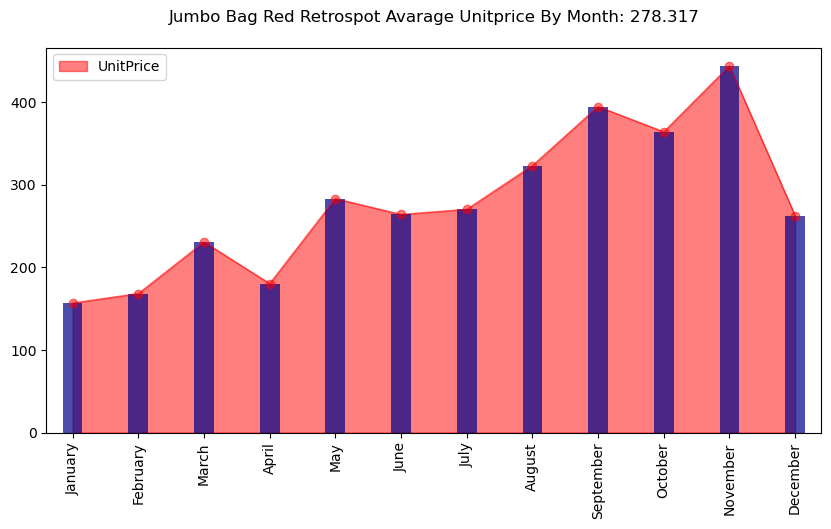

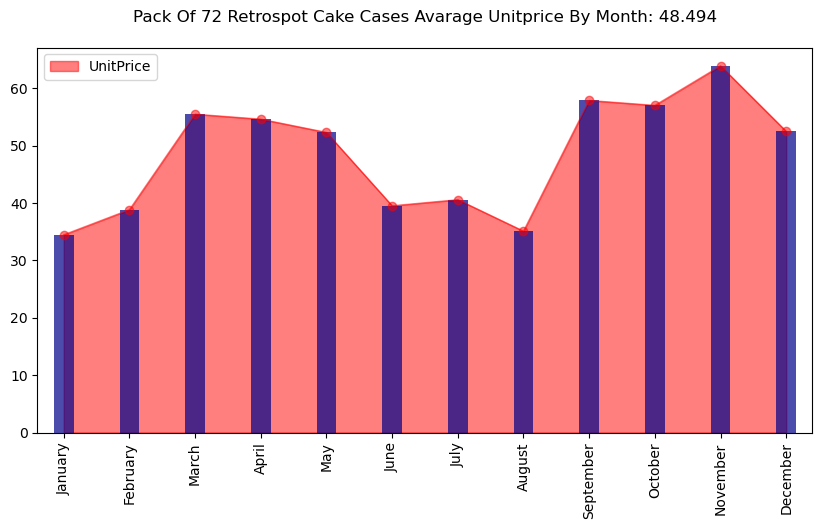

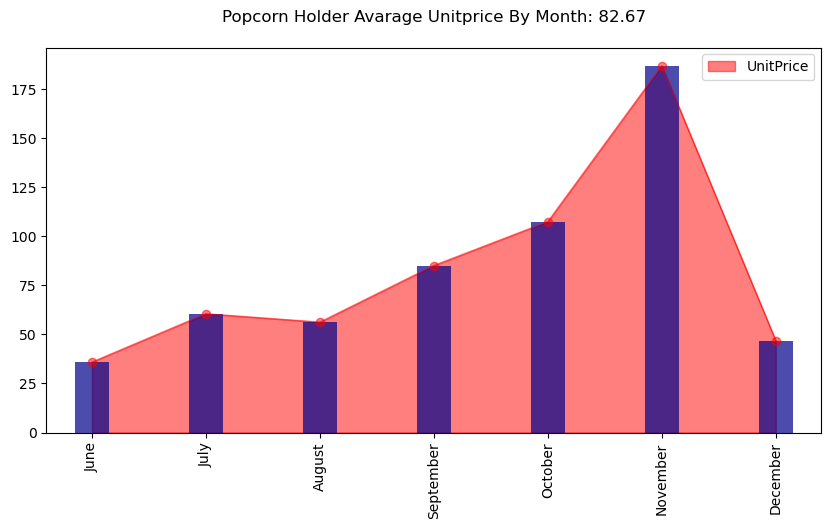

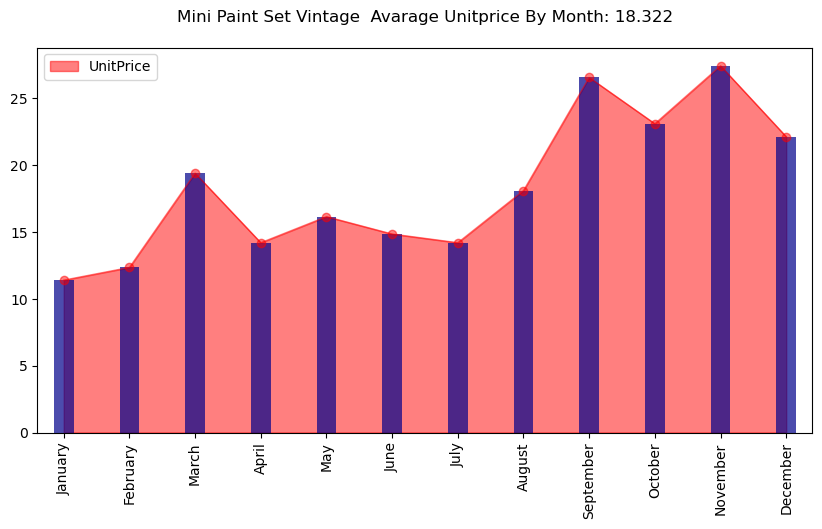

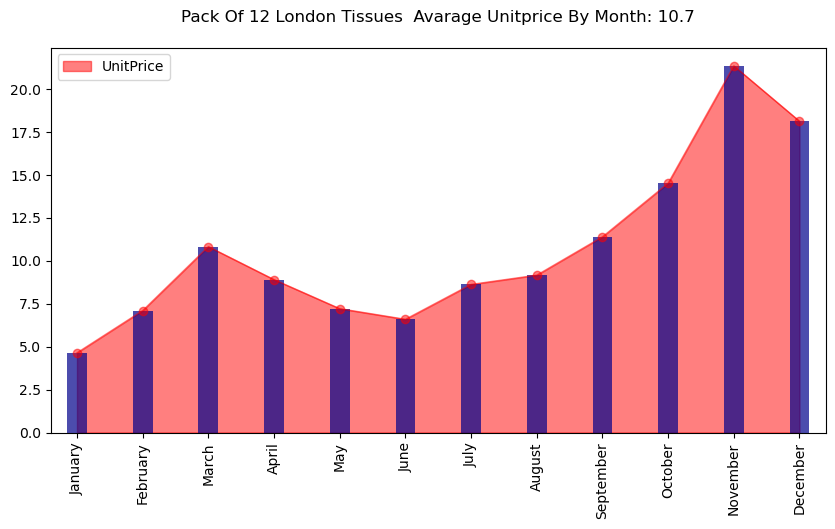

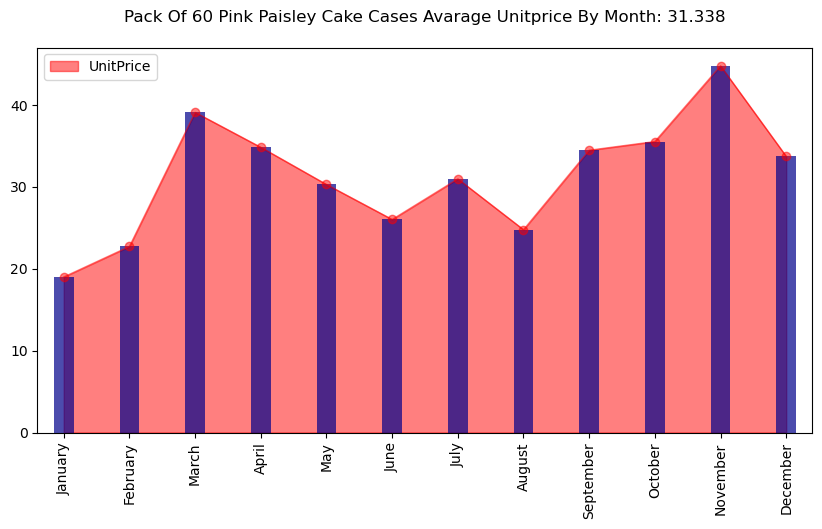

In [243]:
for x in get_max('Quantity').reset_index()['Description'].tolist():
    get_product_performance_(x,'UnitPrice','m')

## Top 3 Best Selling Products Performance By Days, Months, Weeks and Hours On Quantity

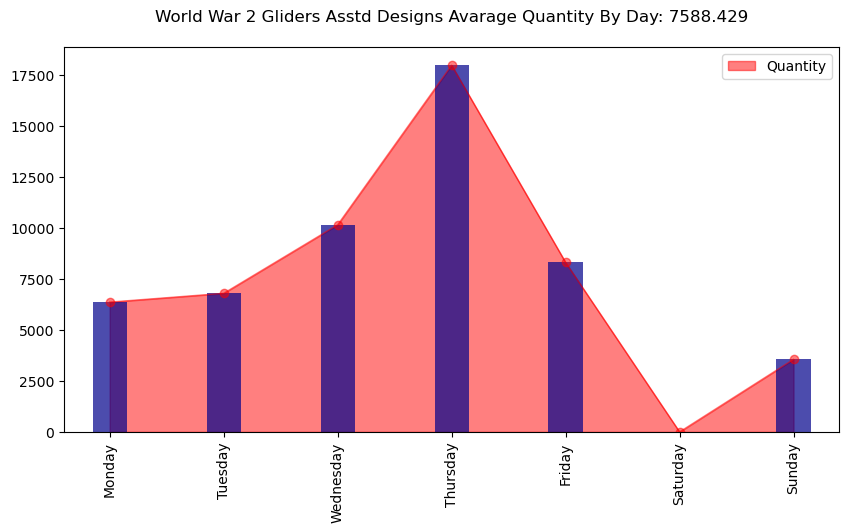

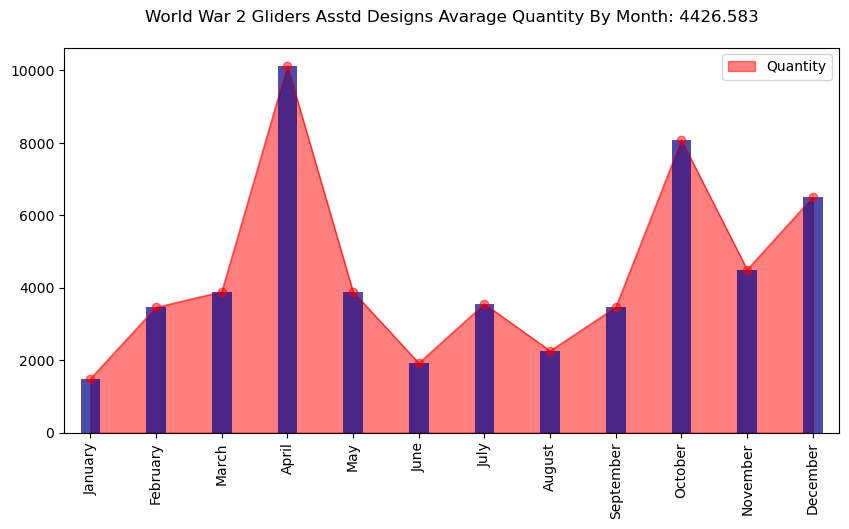

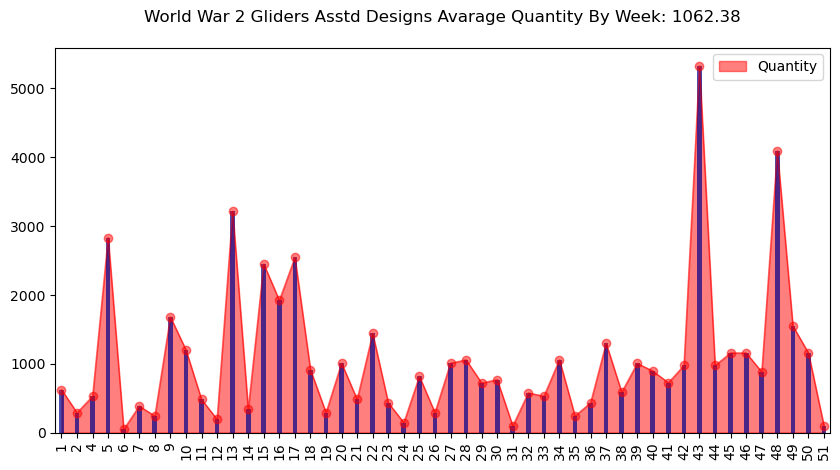

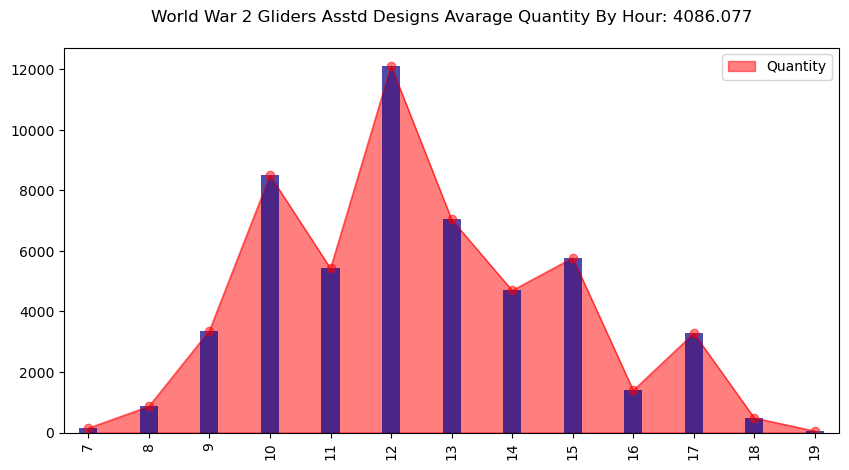

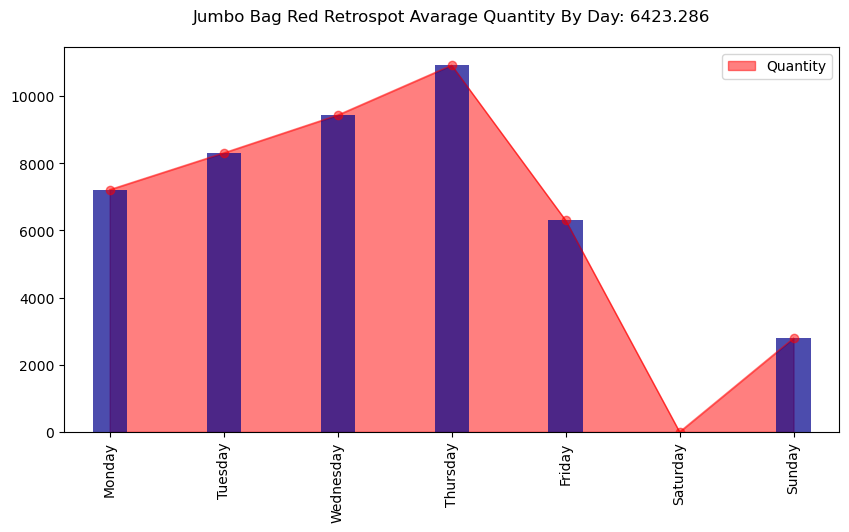

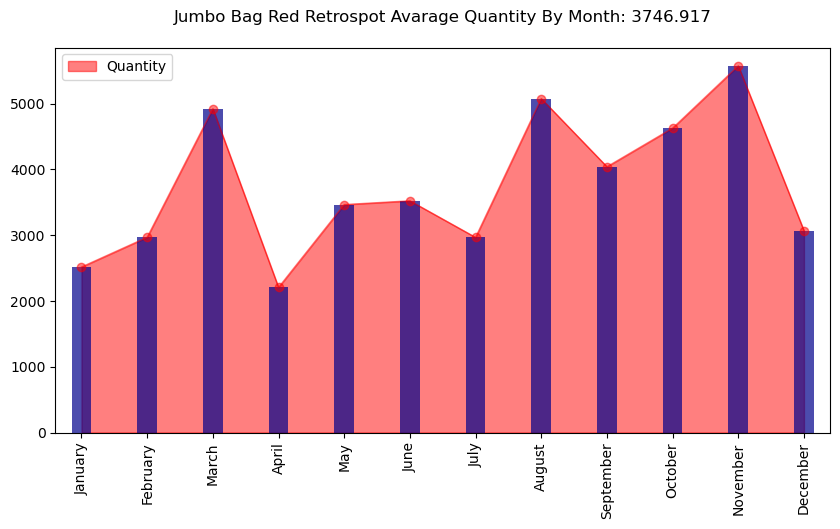

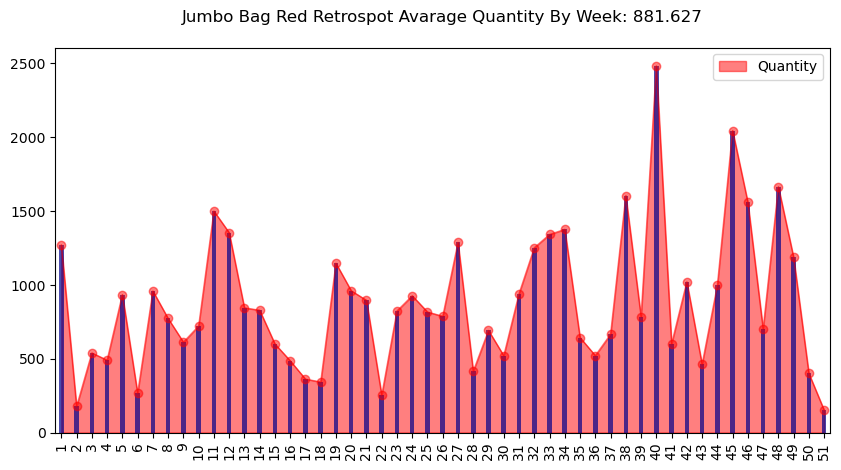

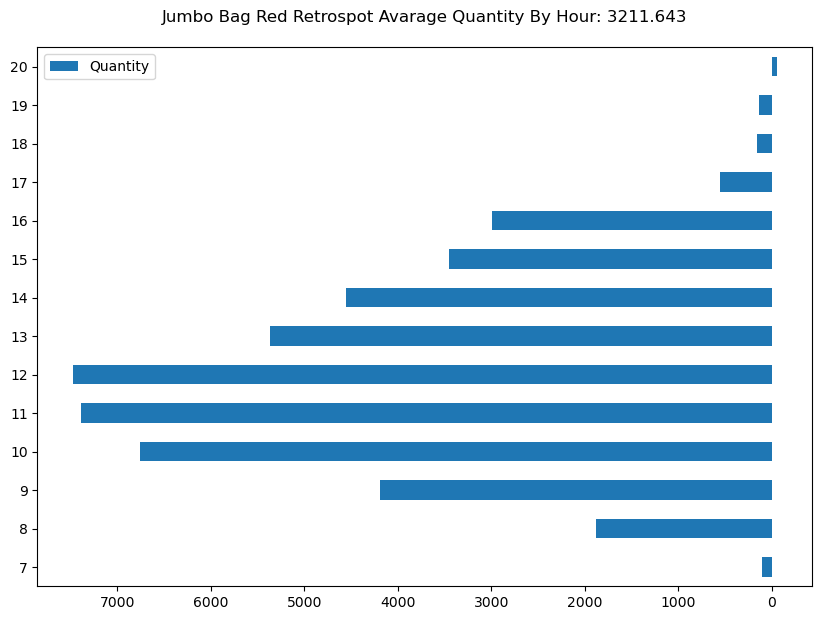

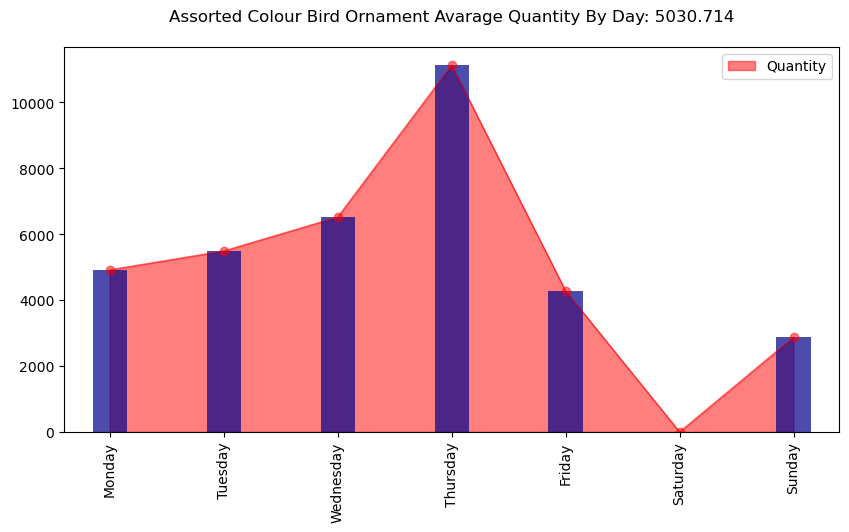

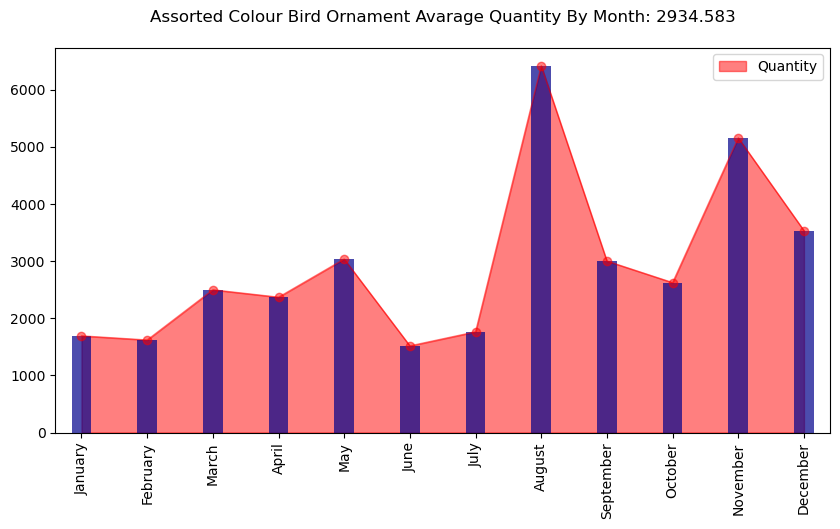

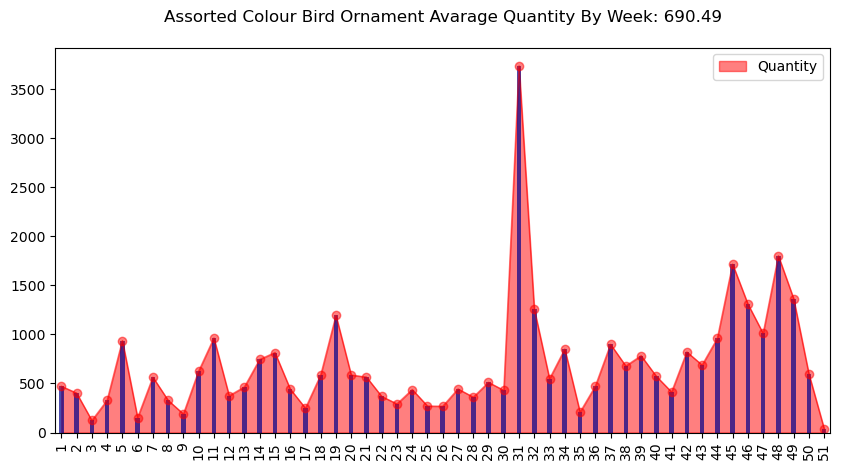

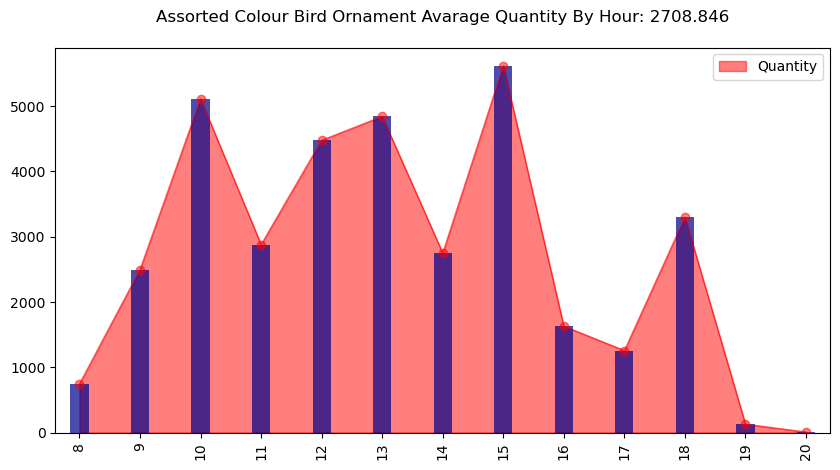

In [244]:
for x in get_max('Quantity',3).reset_index()['Description'].tolist():
    for i in 'd','m','w','h':
        get_product_performance_(x,'Quantity',i)

## Top 3 Best Selling Products Performance By Days, Months, Weeks and Hours On UnitPrice

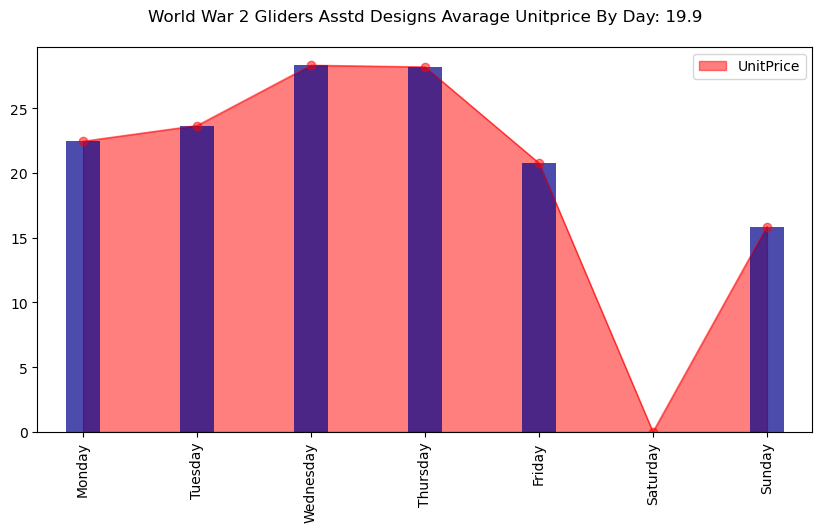

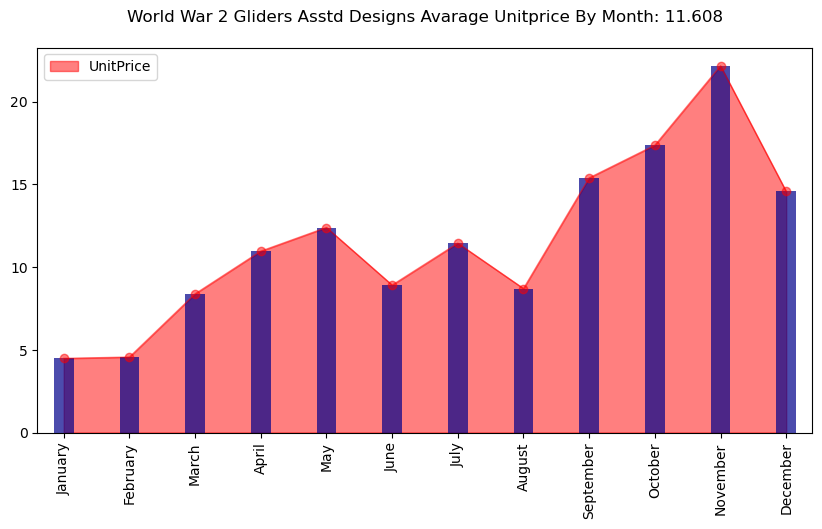

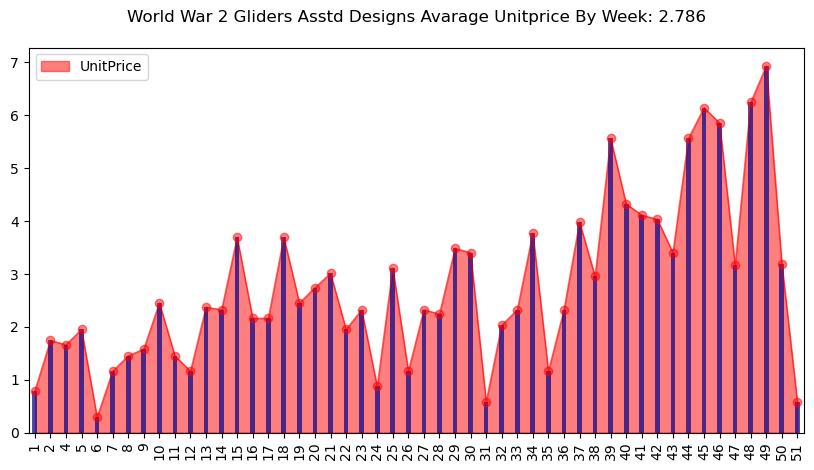

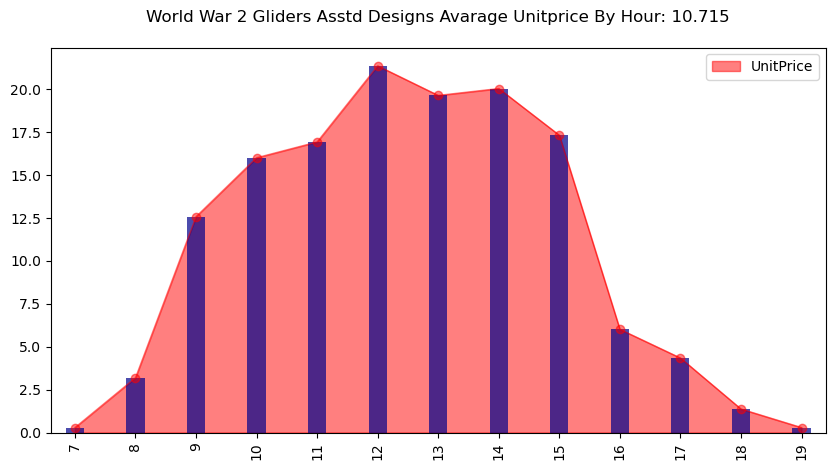

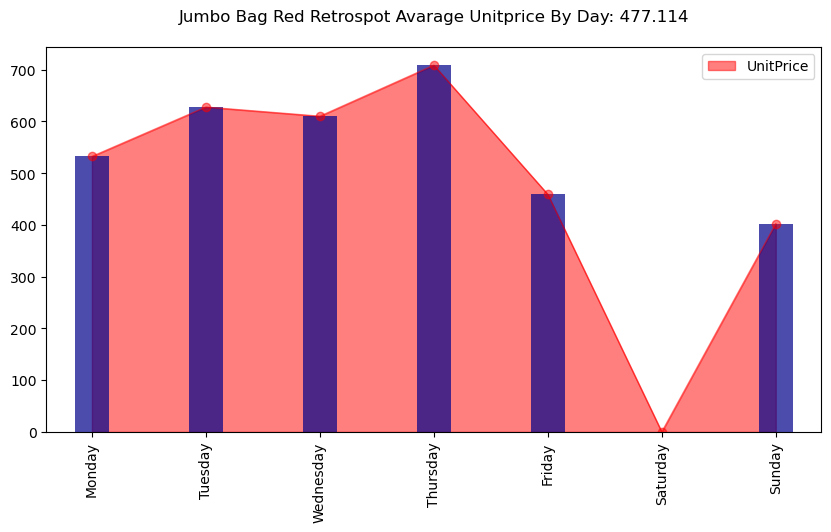

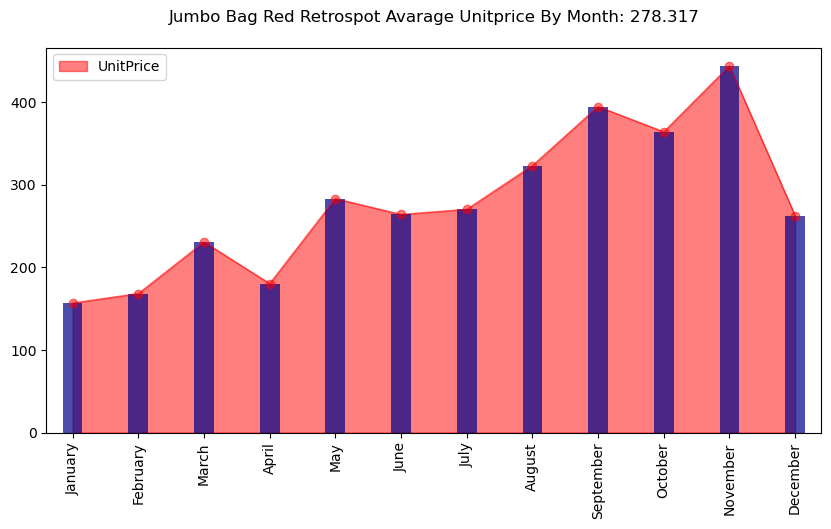

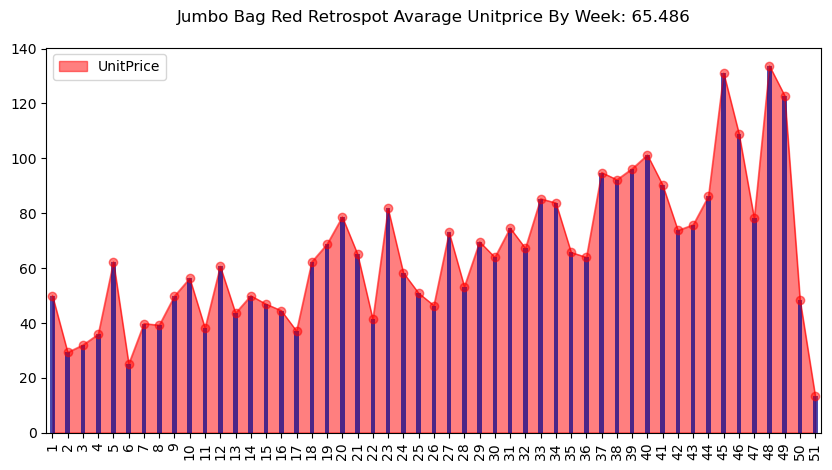

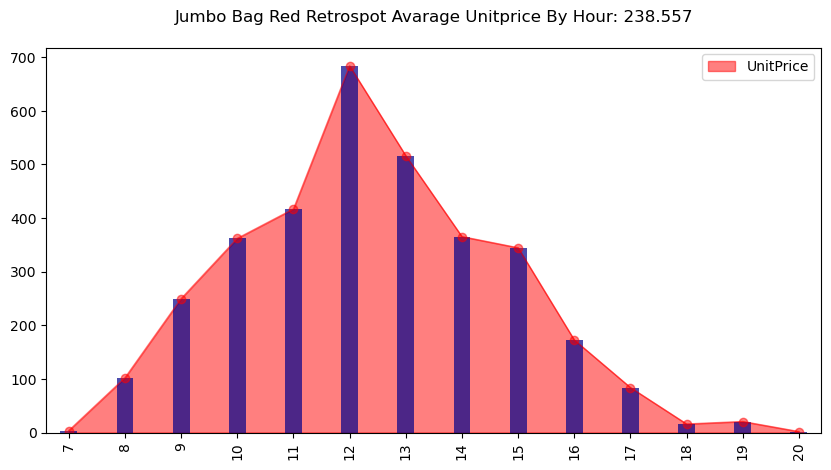

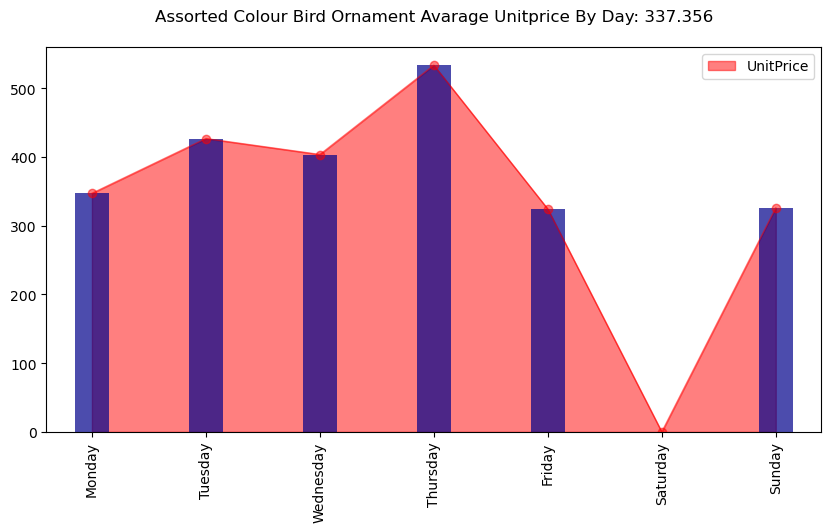

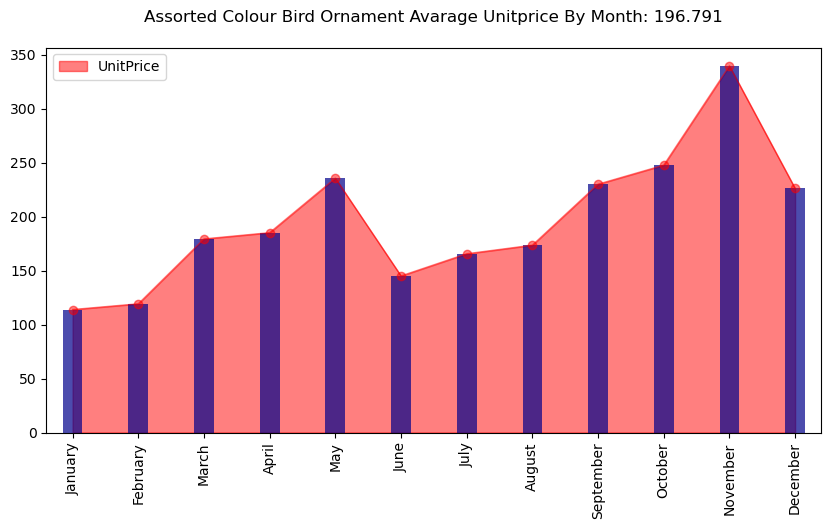

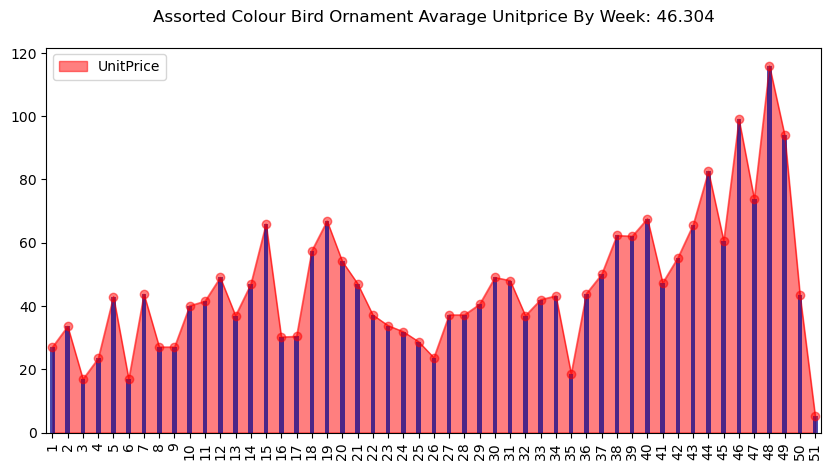

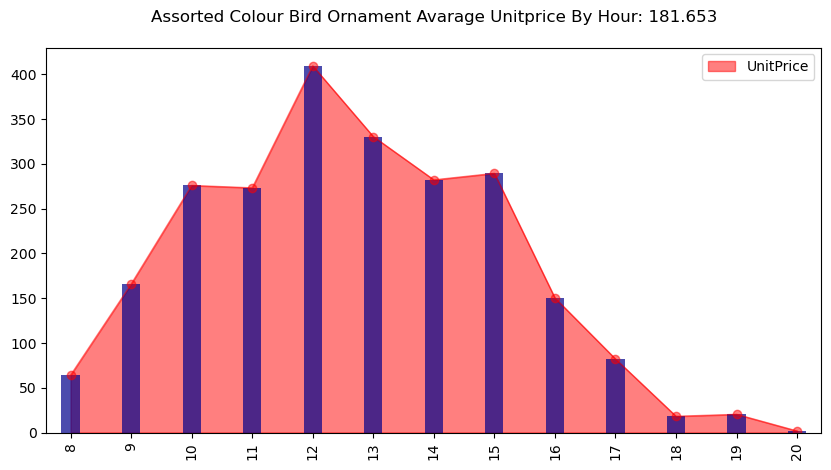

In [245]:
for x in get_max('Quantity',3).reset_index()['Description'].tolist():
    for i in 'd','m','w','h':
        get_product_performance_(x,'UnitPrice',i)

# 3. The Store's Most Valuable Customers

## The Store's Most Valuable Customers By CustomerID, Product and Country

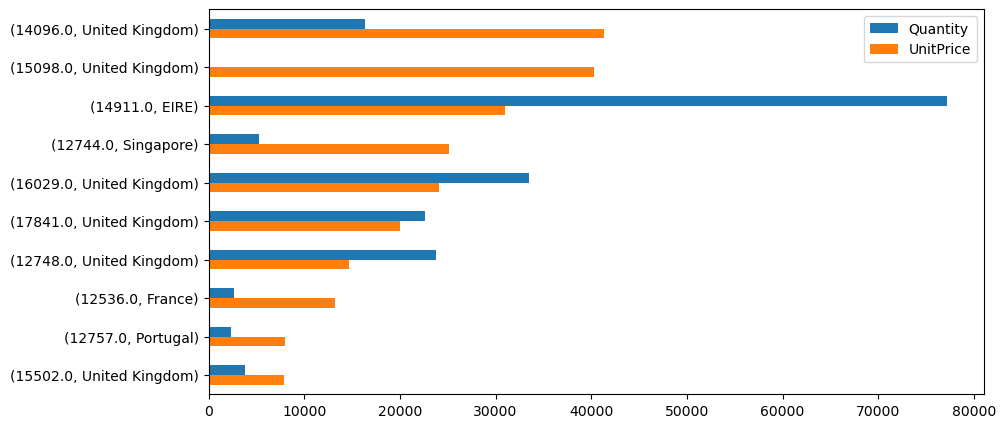

In [248]:
get_customer('UnitPrice')

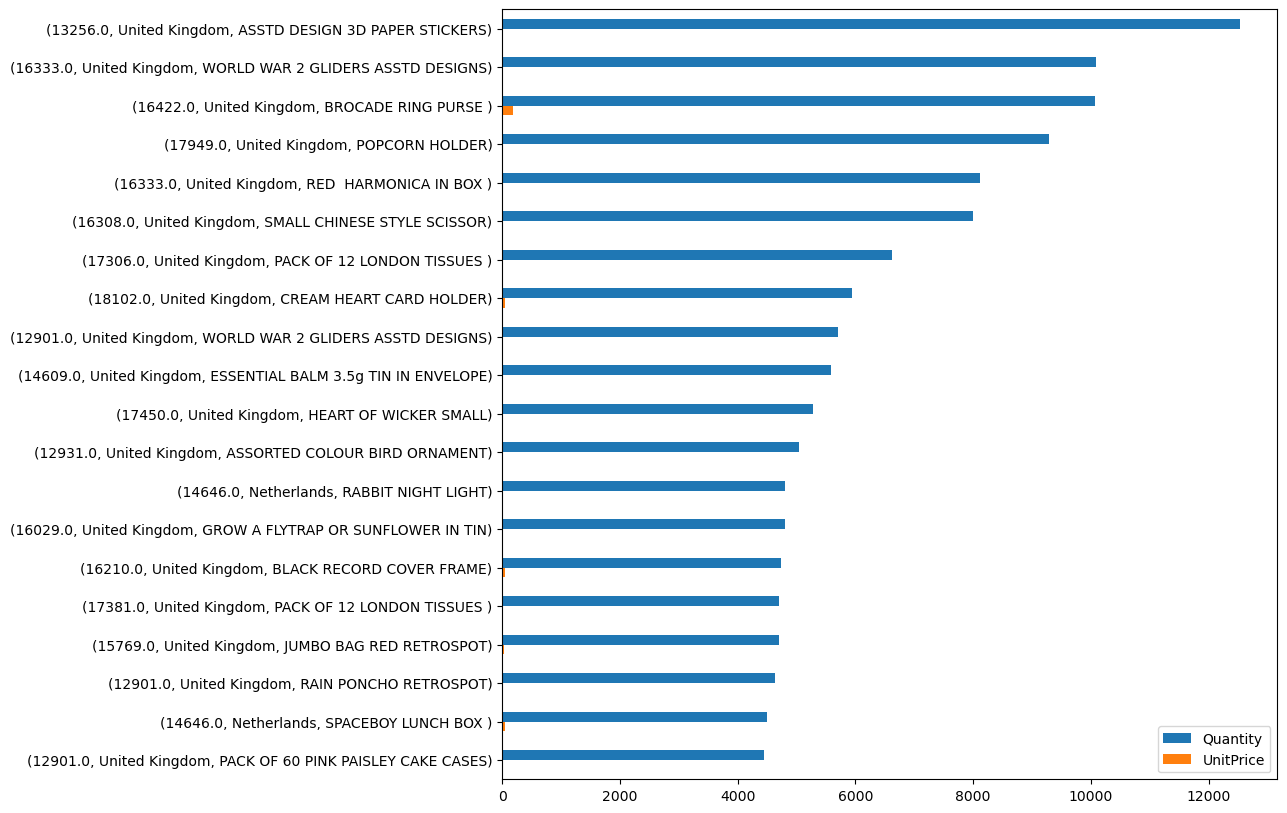

In [250]:
get_customer('Quantity',20, desc=0)

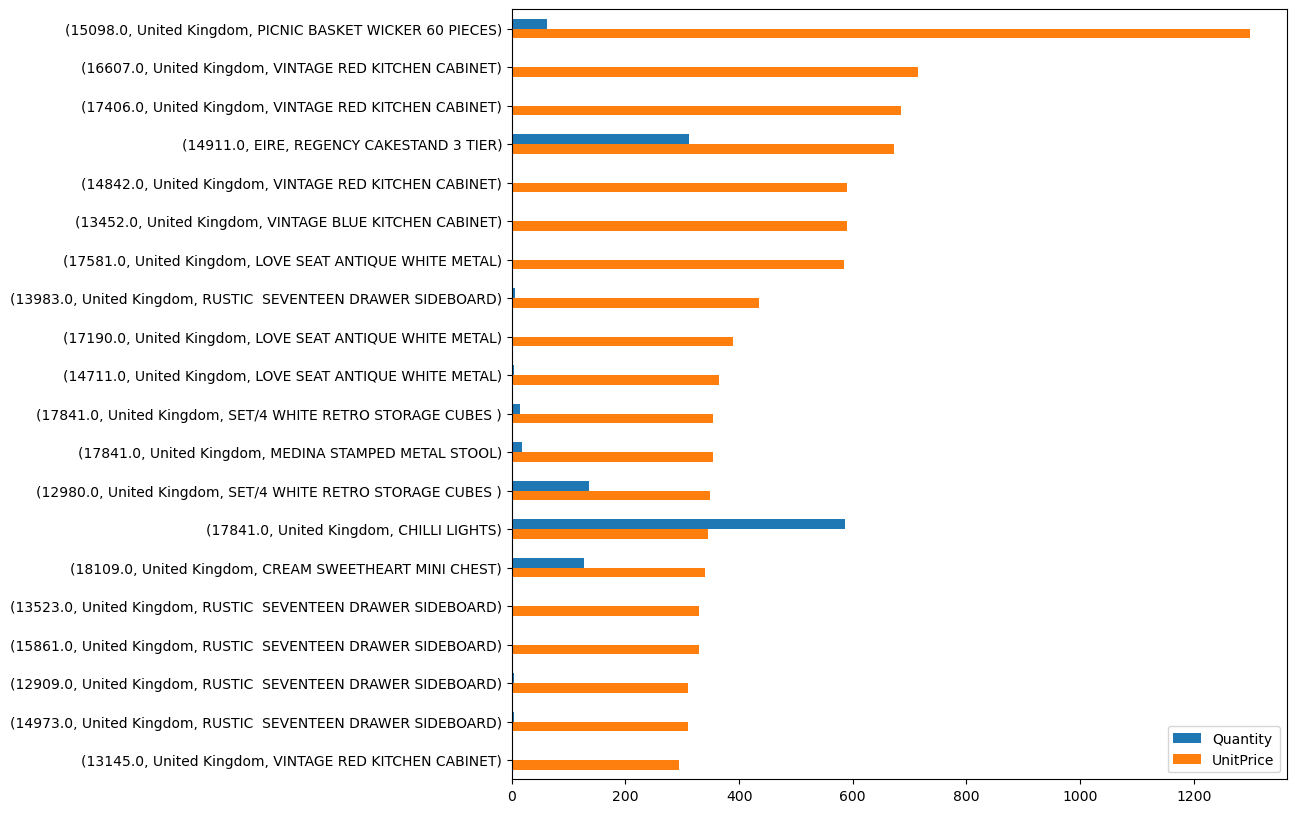

In [1570]:
get_customer('UnitPrice',20, desc=1)

## Some Additional Insights

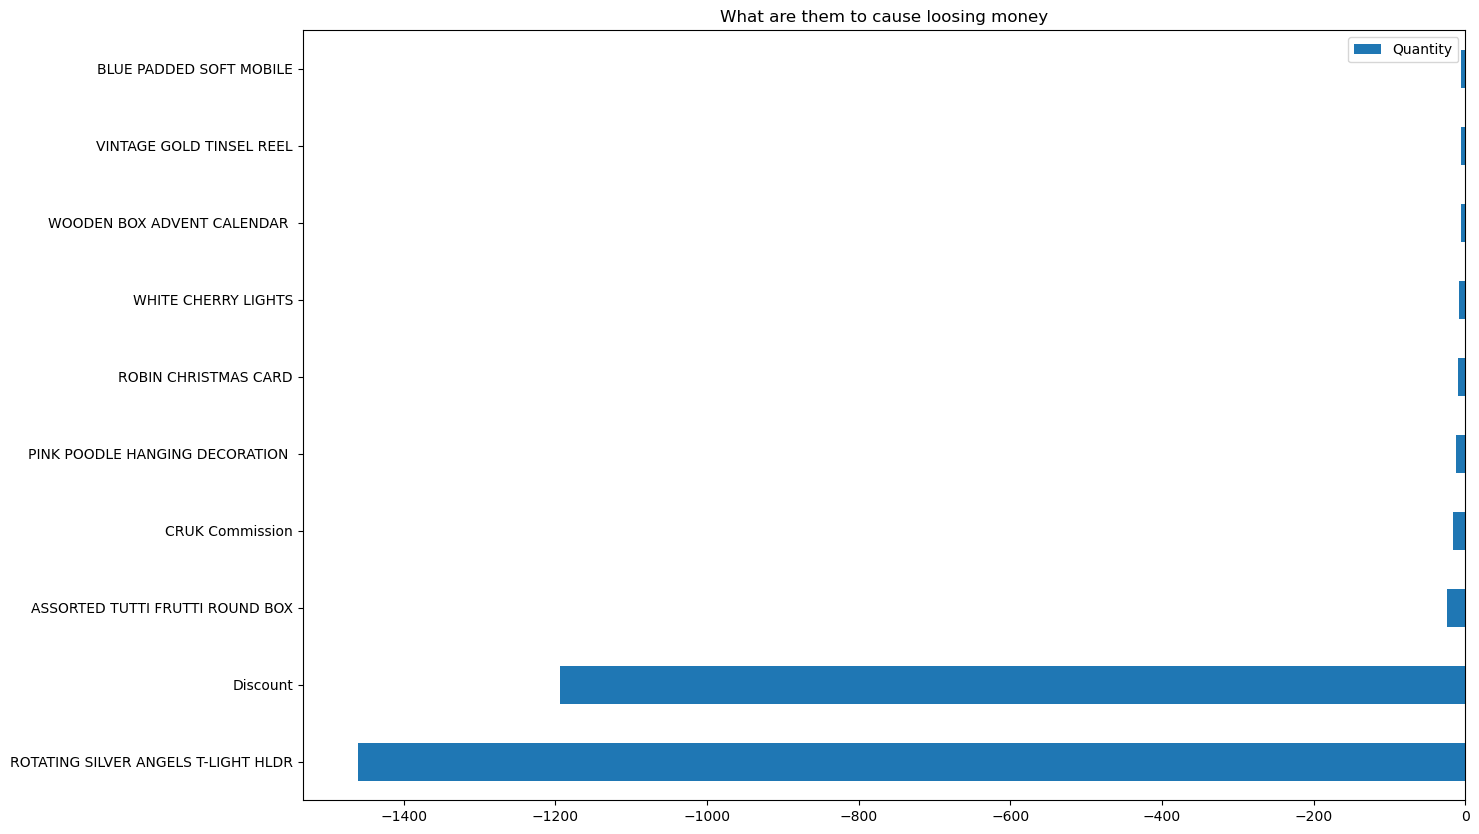

In [23]:
get_min('Quantity',10).plot(kind="barh",figsize=(15,10), xlabel="", title="What are them to cause loosing money").invert_yaxis()

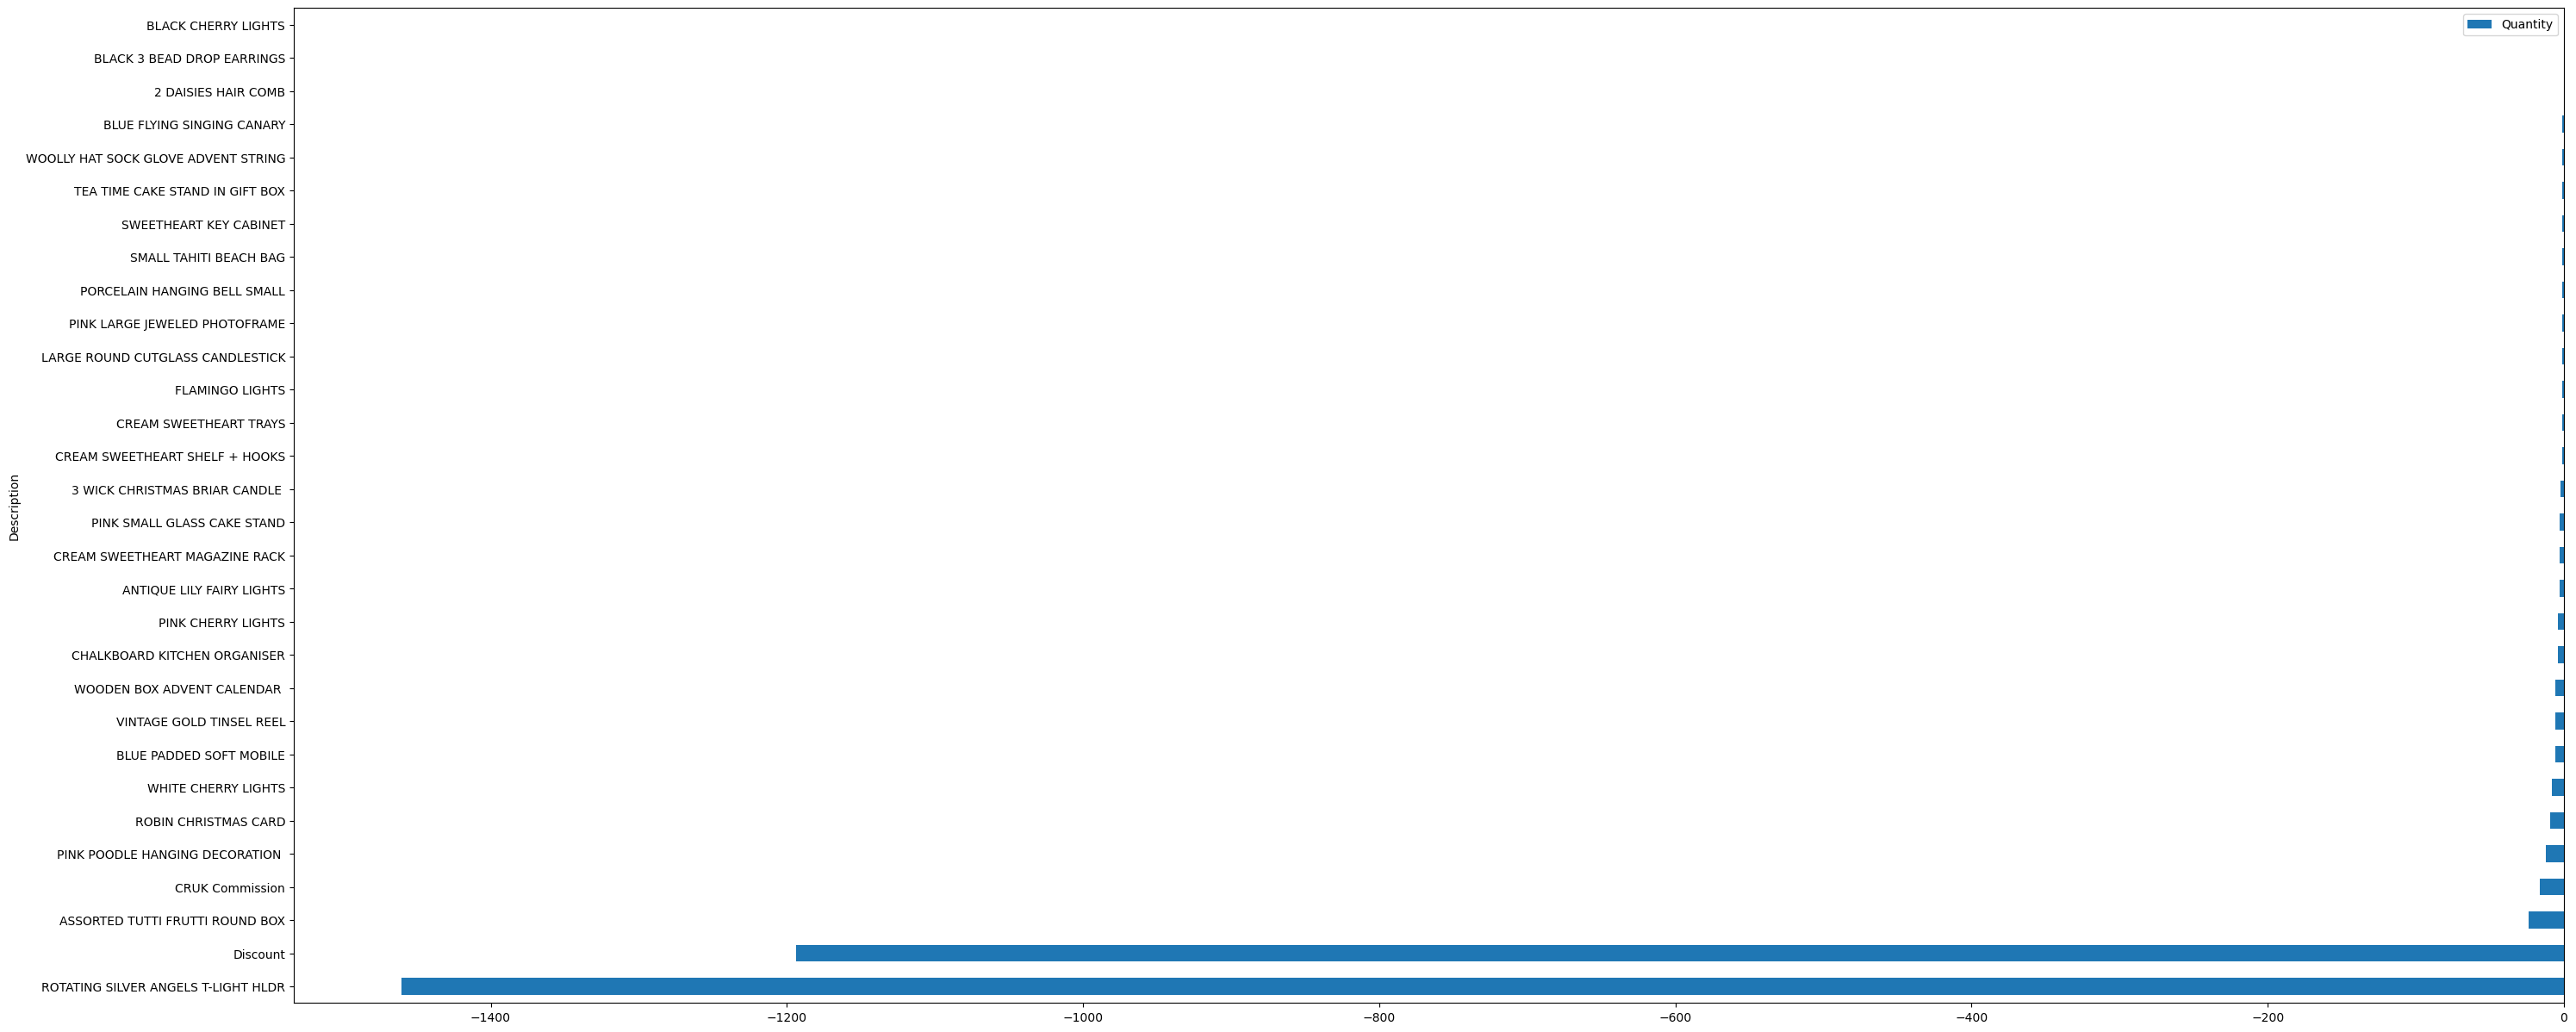

In [30]:
get_min('Quantity',30).plot(kind="barh",figsize=(34,15)).invert_yaxis()

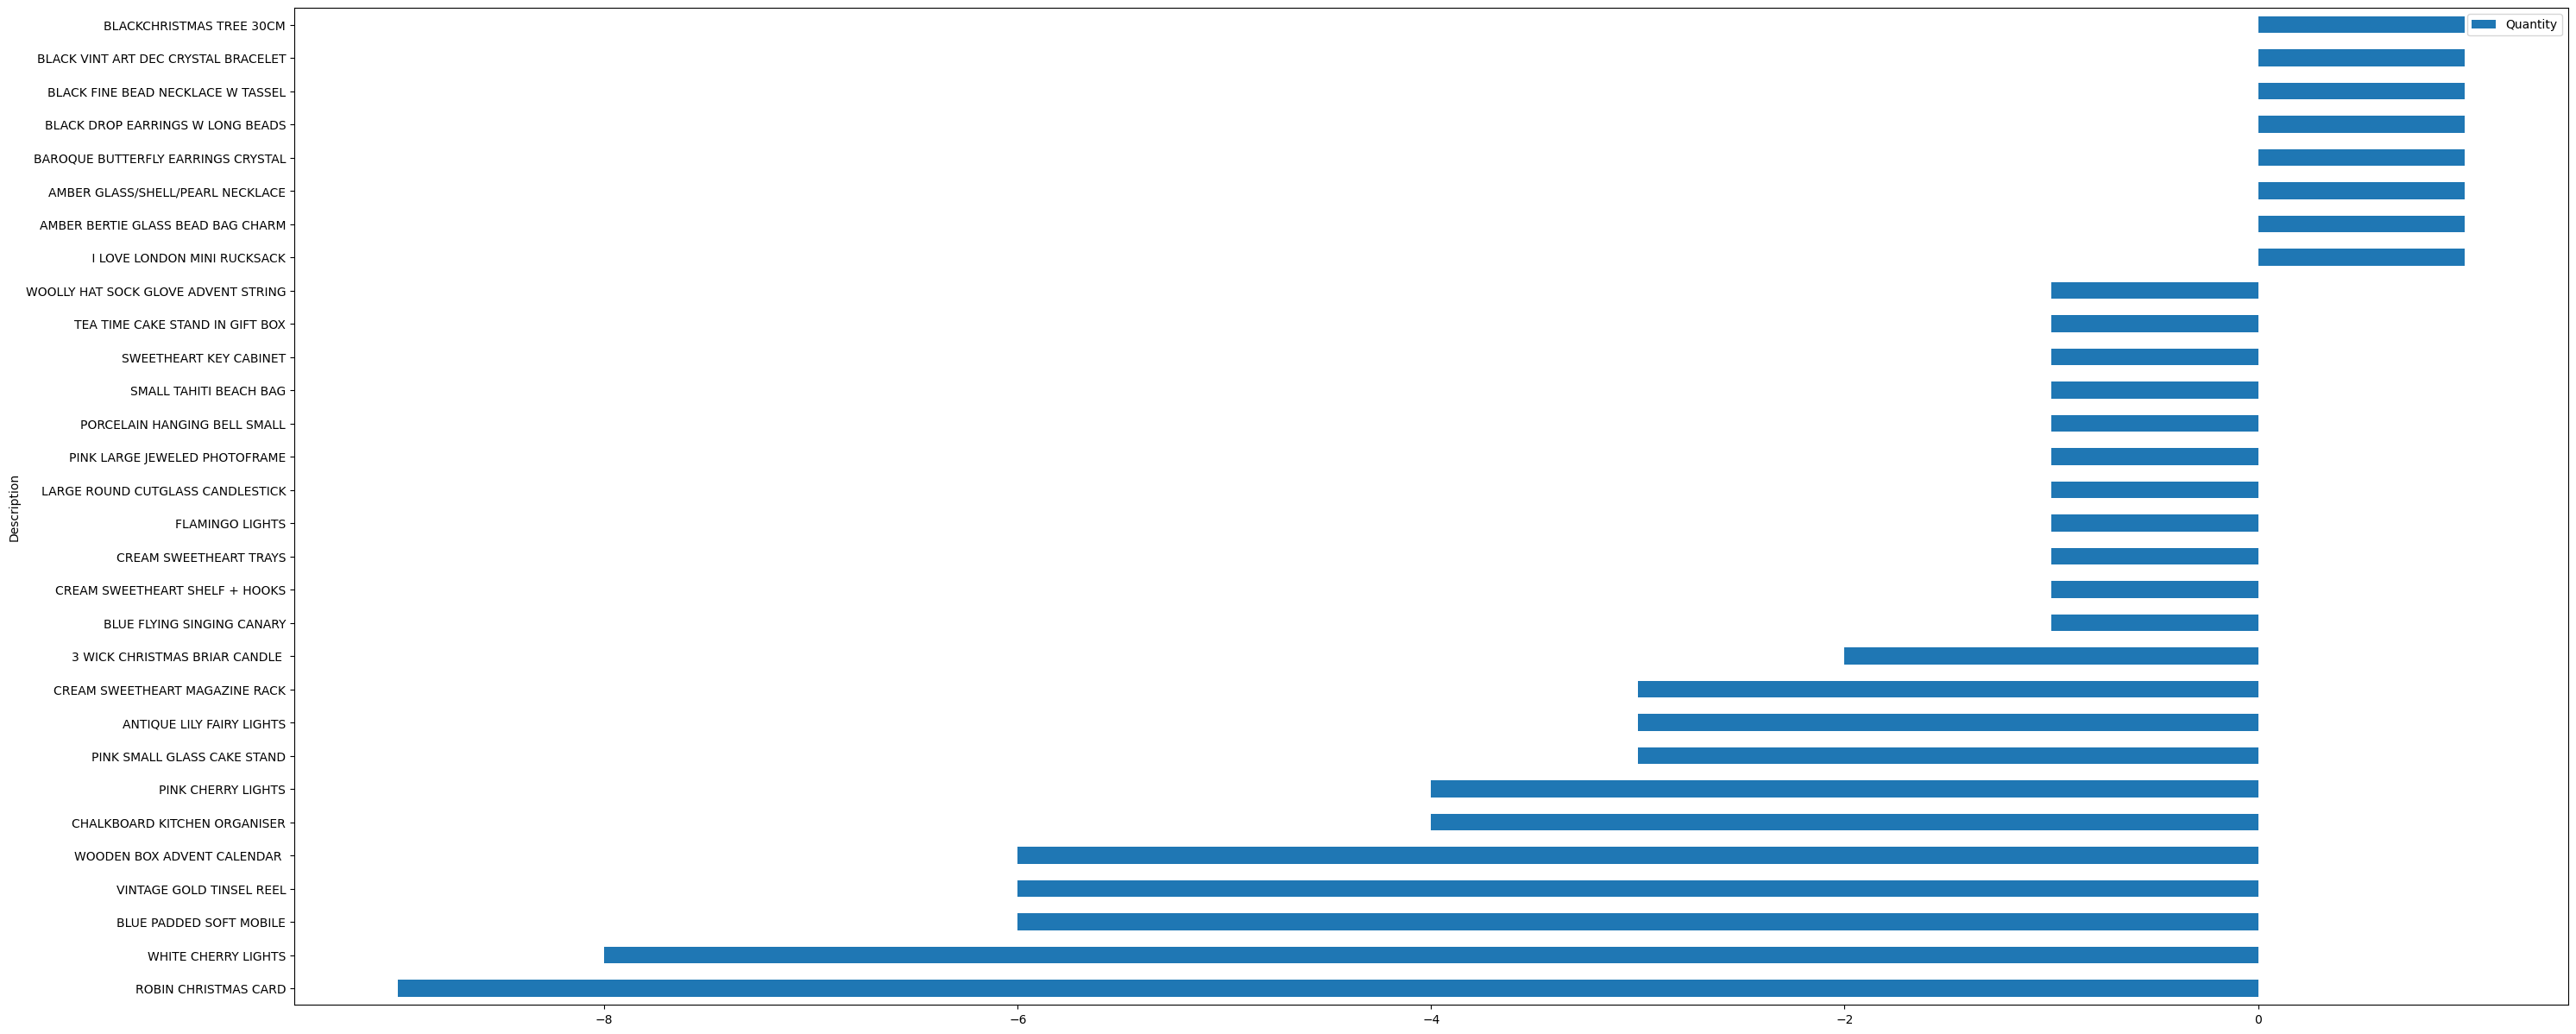

In [117]:
get_min('Quantity',50,5).plot(kind="barh",figsize=(34,15)).invert_yaxis()

<AxesSubplot:title={'center':'Discount Avarage Unitprice By Month: 465.109\n'}>

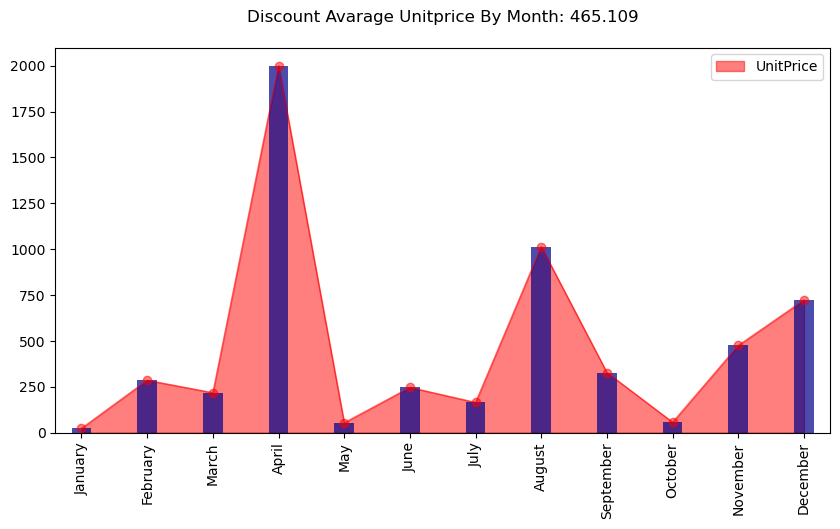

In [1481]:
get_product_performance_('Discount','UnitPrice','m')

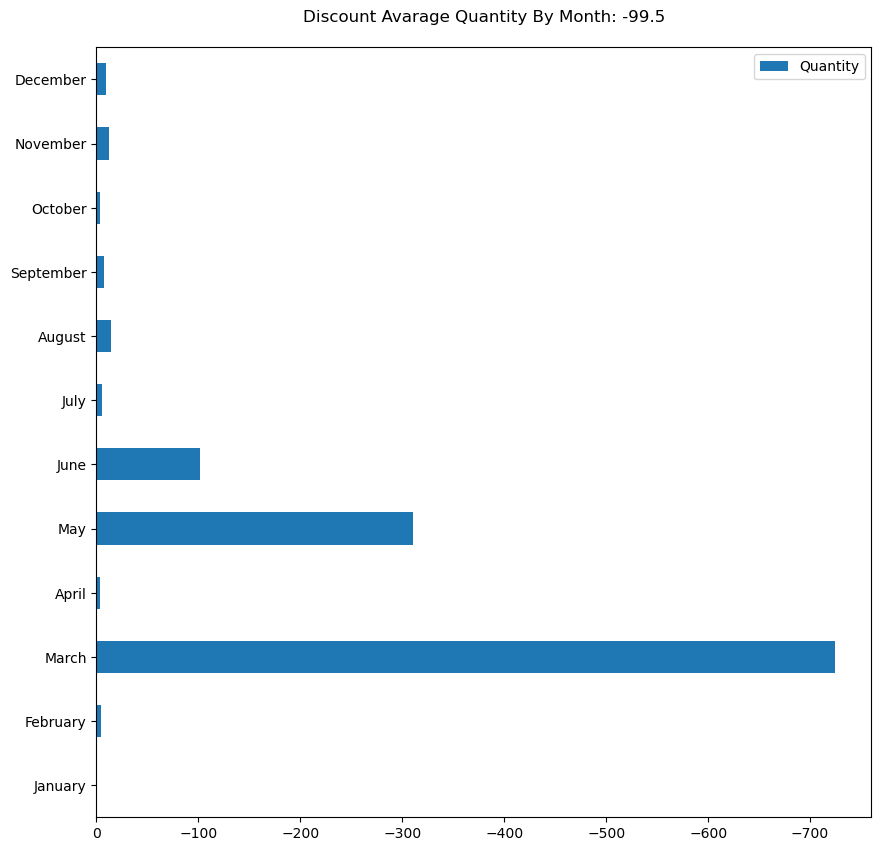

In [1480]:
get_product_performance_('Discount','Quantity','m')

<AxesSubplot:title={'center':'World War 2 Gliders Asstd Designs Avarage Quantity By Month: 4426.583\n'}>

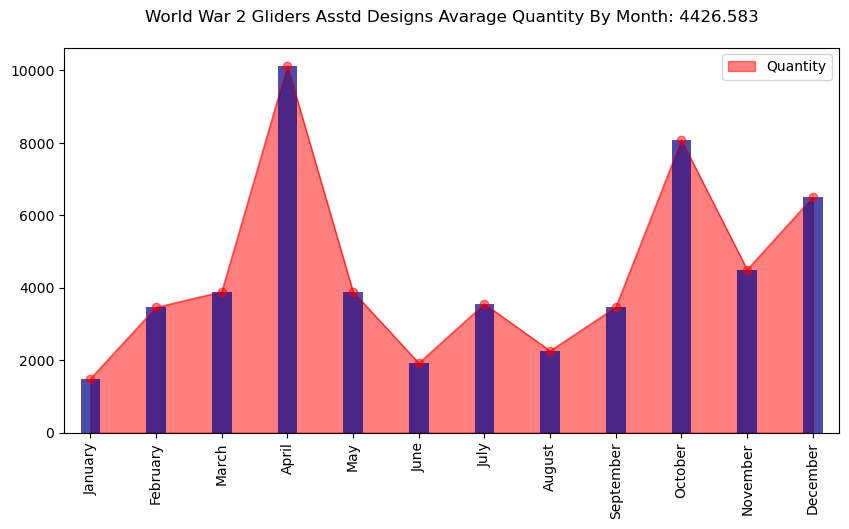

In [1483]:
get_product_performance_('World War 2 Gliders Asstd Designs'.upper(),'Quantity','m')

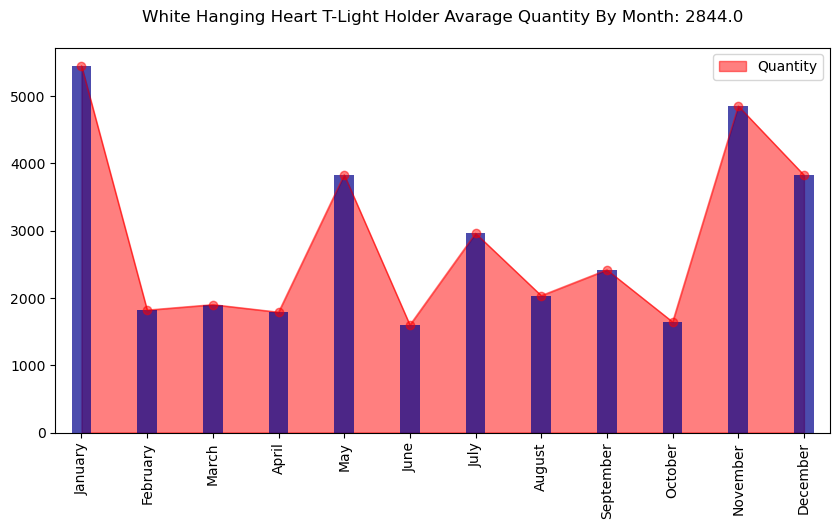

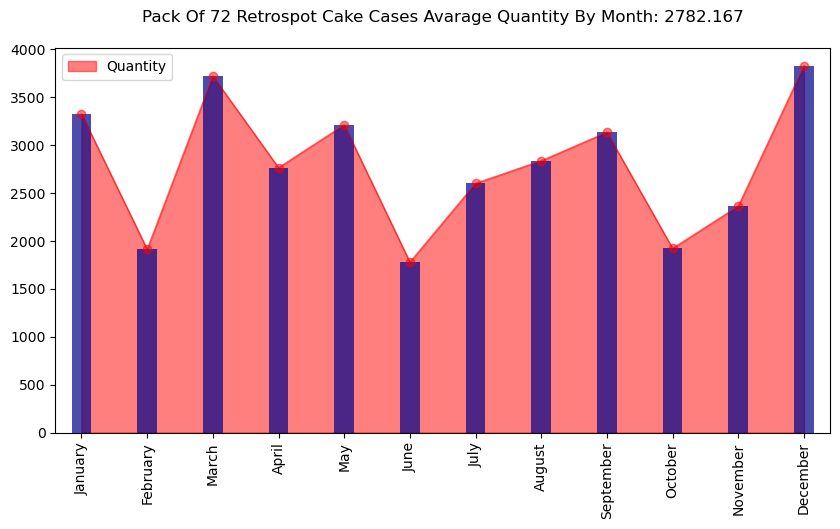

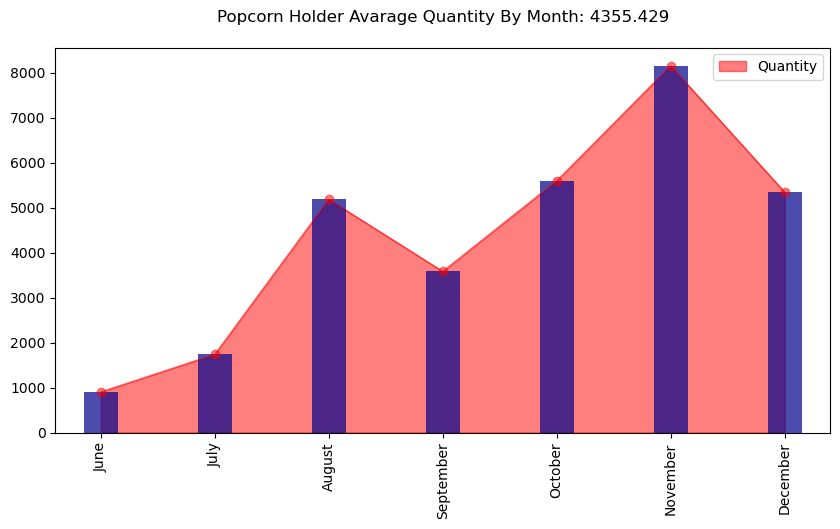

In [1490]:
for x in get_max('Quantity',6,3).reset_index()['Description'].tolist():
    get_product_performance_(x,'Quantity')

This product:  WHITE CHERRY LIGHTS  only dated once no more data to calculate


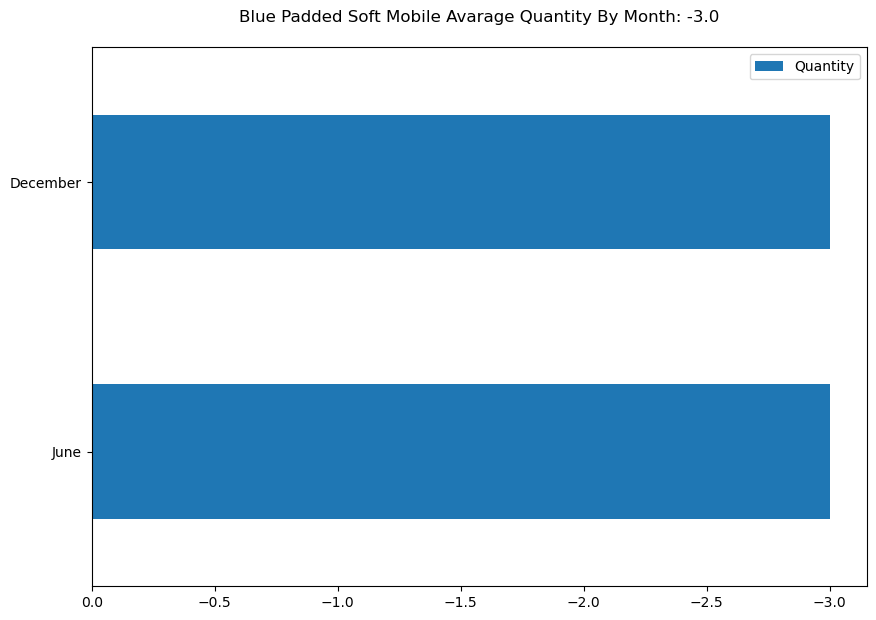

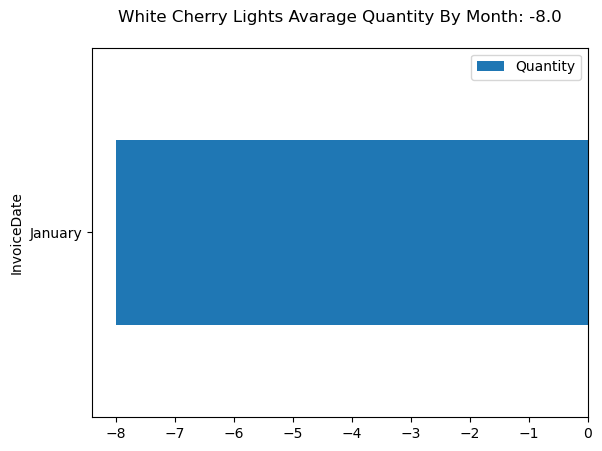

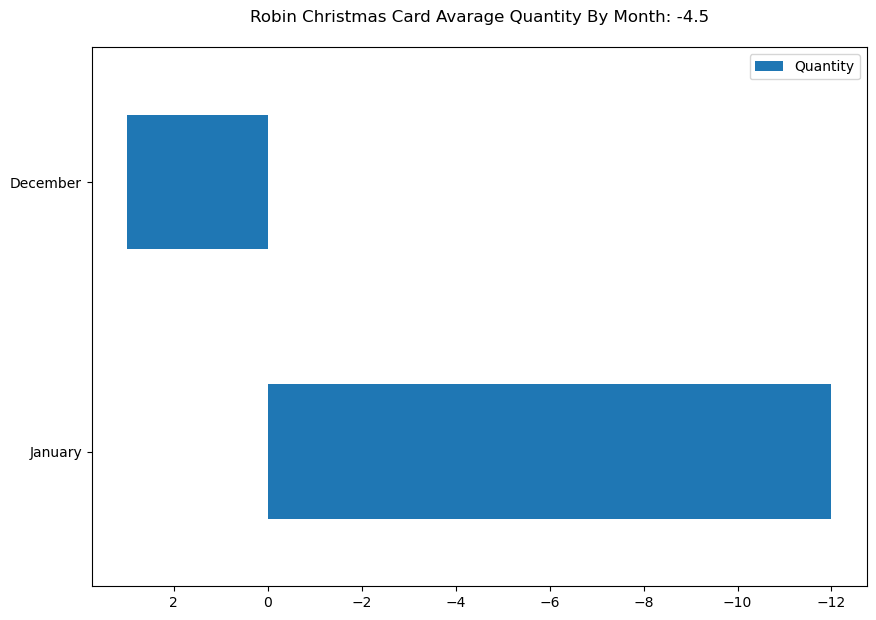

In [1489]:
for x in get_min('Quantity',8,5).reset_index()['Description'].tolist():
    get_product_performance_(x,'Quantity')

# Conclusion

- Store is not open to transactions on Saturdays and this is seemingly causing a drop in profit margin.
-  Additionally, working hours are from 7 to 20. Apparently, if the store was closed in these hours, there wouldn't be any tangible loss in profit. However, to be open on Saturdays would've brought more than those two hours. 

- Customers are extremely sensitive to discounts, they are used to selecting discounts in UnitPrice over Quantity. However, this doesn't mean discount in Quantity not help.

- Perhaps, discounts in a handful of products rather than huge quantity might help to recover loosing in discounts. Products remains on shelves less than 3 months are not profitable. 

* Overall customers buying behaviour increase after August most probably related to Thaknsgiving, Christmas and holiday season. Retro concept and products associated with culinary, love and past are amongst the most popular one.

